# 대학 취업률 현황 분석

#### 기획
1. 전국 대학 취업률 순위 분석
2. 대학 종류 별에 따른 취업률 현황 분석

## 대학 분석
* university
> Year: 연도  
> university_Type: 학교 종류  
> Establishment_Type: 설립구분  
> Region: 지역  
> Status: 상태  
> Name: 학교명

<br>

* employed
> Year: 연도  
> Name: 학교명  
> Graduates_Male: 졸업자_남  
> Graduates_Female: 졸업자_여  
> Employed_Male: 건강보험직장가입자_남  
> Employed_Female: 건강보험직장가입자_여  
> Overseas_Employment_Male: 해외 취업자_남  
> Overseas_Employment_Female: 해외 취업자_여  
> Agriculture_Fishery_Male: 농림어업 종사자_남  
> Agriculture_Fishery_Female: 농림어업 종사자_여  
> Creative_Activities_Male: 개인창작활동종사자_남  
> Creative_Activities_Female: 개인창작활동종사자_여  
> Entrepreneurship_Male: 1인창(사)업자_남  
> Entrepreneurship_Female: 1인창(사)업자_여  
> Freelancer_Male: 프리랜서_남  
> Freelancer_Female: 프리랜서_여  
> Uncounted_Male: 취업률 미집계_남  
> Uncounted_Female: 취업률 미집계_여  
> Others_Male: 기타_남  
> Others_Female: 기타_여  
> Employment_Rate: 취업률  
> Pre_Employment_Male: 입학 당시 기취업자_남  
> Pre_Employment_Female: 입학 당시 기취업자_여  
> Campus_Employment_Male: 교내취업자_남  
> Campus_Employment_Female: 교내취업자_여
>
> ※ 취업률 계산법:  
> {(Employed + Overseas_Employment + Agriculture_Fishery + Creative_Activities + Entrepreneurship +Freelancer) / (Graduates - Uncounted)} * 100

<br>

* uncounted
> Year: 연도  
> Name: 학교명  
> Scholar_Male: 진학자_남  
> Scholar_Female: 진학자_여  
> Military_Male: 입대자_남  
> Unemployed_Male: 취업불가능자_남  
> Unemployed_Female: 취업불가능자_여  
> Foreign_Male: 외국인유학생_남  
> Foreign_Female: 외국인유학생_여  
> Excluded_Male: 제외인정자_남  
> Excluded_Female: 제외인정자_여  
>
> ※ 제외 인정자  
> 의료급여 수급권자, 여군 중 임관전 훈련생, 종교지도자 양성 학생.

### Ⅰ. 데이터 탐색

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')
# 컬러맵의 색상 선택
colors = cmap(np.array([0, 1, 2, 3, 4, 5, 6]))

# 한글 폰트 경로 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
import pandas as pd

### ○ 대학 정보 데이터셋

In [3]:
# 대학 데이터 호출
un_df = pd.read_csv("./datasets/university.csv")
un_df

,Year,University_Type,Establishment_Type,Region,Status,Name
0,2020,대학교,사립,경남,기존,가야대학교(김해)
1,2020,대학교,사립,경기,기존,가천대학교
2,2020,대학교,사립,강원,기존,가톨릭관동대학교
3,2020,대학교,사립,충북,기존,가톨릭꽃동네대학교
4,2020,대학교,사립,경기,기존,가톨릭대학교
...,...,...,...,...,...,...
1167,2022,전문대학,사립,강원,기존,한림성심대학교
1168,2022,전문대학,사립,서울,기존,한양여자대학교
1169,2022,전문대학,사립,전남,기존,한영대학교
1170,2022,전문대학,사립,충남,기존,혜전대학교


In [4]:
# un_df의 정보 가져오기
un_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                1172 non-null   int64 
 1   University_Type     1172 non-null   object
 2   Establishment_Type  1172 non-null   object
 3   Region              1172 non-null   object
 4   Status              1172 non-null   object
 5   Name                1172 non-null   object
dtypes: int64(1), object(5)
memory usage: 55.1+ KB


#### 📊 각 피처의 데이터 별 개수 확인

In [5]:
year_count = un_df['Year'].value_counts().reset_index()
year_count

,Year,count
0,2020,392
1,2022,391
2,2021,389


In [6]:
u_type_count = un_df['University_Type'].value_counts().reset_index()
u_type_count

,University_Type,count
0,대학교,636
1,전문대학,408
2,기능대학,85
3,교육대학,30
4,산업대학,7
5,각종학교(대학),6


In [7]:
e_type_count = un_df['Establishment_Type'].value_counts().reset_index()
e_type_count

,Establishment_Type,count
0,사립,998
1,국립,123
2,공립,24
3,특별법법인,12
4,특별법국립,9
5,국립대법인,6


In [8]:
re_count = un_df['Region'].value_counts().reset_index()
re_count

,Region,count
0,경기,212
1,서울,165
2,경북,105
3,충남,78
4,강원,72
5,부산,71
6,경남,69
7,전남,66
8,전북,62
9,충북,57


In [9]:
sta_count = un_df['Status'].value_counts().reset_index()
sta_count

,Status,count
0,기존,1150
1,폐교,22


In [10]:
name_count = un_df['Name'].value_counts().reset_index()
name_count

,Name,count
0,가야대학교(김해),3
1,계명문화대학교,3
2,대전보건대학교,3
3,대전과학기술대학교,3
4,대원대학교,3
...,...,...
390,우송대학교(산업대),1
391,동부산대학교,1
392,인제대학교 _제2캠퍼스,1
393,한북대학교,1


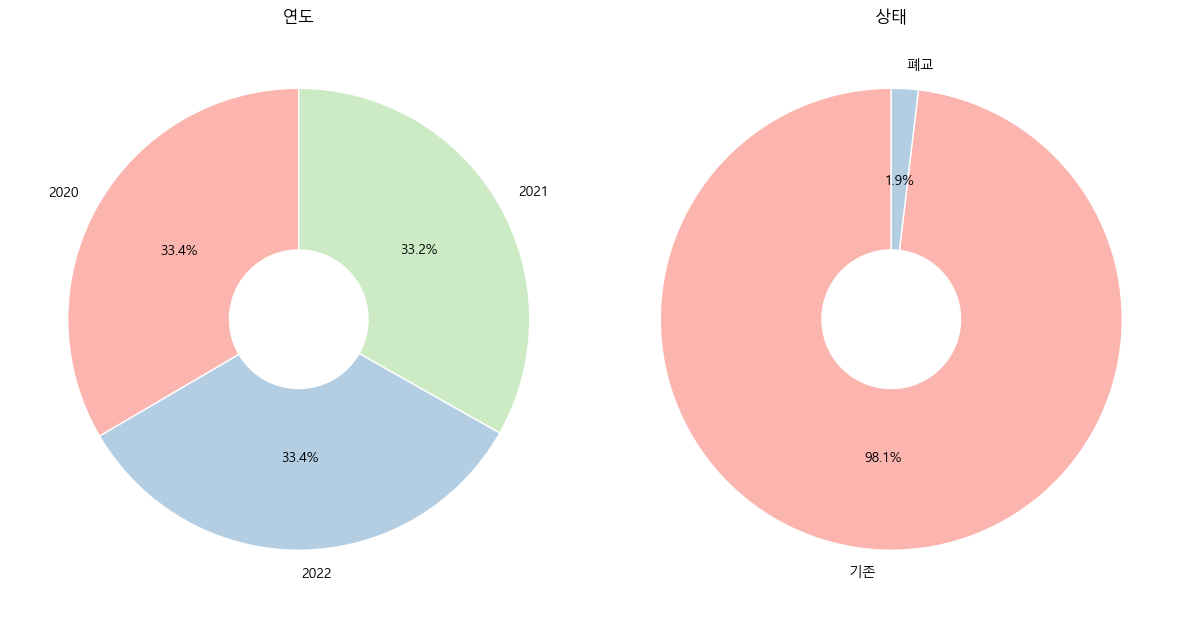

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# 타겟 데이터 비중 변경 전/후 차이 그래프 확인
fig, axes = plt.subplots(1, 2, figsize=(12, 10))

# 부채꼴 스타일
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

year_counts = year_count['count']
year_labels = year_count['Year']

status_counts = sta_count['count']
status_labels = sta_count['Status']

# 그래프 그리기
axes[0].pie(year_counts, labels=year_labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)
axes[0].set_title('연도')

axes[1].pie(status_counts, labels=status_labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)
axes[1].set_title('상태')

plt.tight_layout()
plt.show()

#### 📊 결측치 검사

In [12]:
# un_df 결측치 개수 가져오기
un_df.isna().sum()

Year                  0
University_Type       0
Establishment_Type    0
Region                0
Status                0
Name                  0
dtype: int64

#### 📊 중복행 검사

In [13]:
# un_df의 중복행 개수를 가져오기
un_df.duplicated().sum()

0

### ○ 대학 별 취업률 데이터셋

In [14]:
em_df = pd.read_csv("./datasets/employed.csv")
em_df

,Year,Name,Graduates_Male,Graduates_Female,Employed_Male,Employed_Female,Overseas_Employment_Male,Overseas_Employment_Female,Agriculture_Fishery_Male,Agriculture_Fishery_Female,...,Freelancer_Female,Uncounted_Male,Uncounted_Female,Others_Male,Others_Female,Employment_Rate,Pre_Employment_Male,Pre_Employment_Female,Campus_Employment_Male,Campus_Employment_Female
0,2020,가야대학교(김해),251,379,159,264,0,0,0,0,...,3,15,11,72,101,71.4,5,17,3,3
1,2020,가천대학교,"2,084","2,238","1,131","1,149",4,5,0,0,...,92,210,174,627,780,64.3,51,41,24,47
2,2020,가톨릭관동대학교,"1,071",650,517,286,7,1,0,0,...,36,72,53,421,271,56.6,17,8,13,10
3,2020,가톨릭꽃동네대학교,41,64,25,47,0,0,0,0,...,1,6,1,9,14,76.5,0,2,2,0
4,2020,가톨릭대학교,627,969,309,432,2,2,0,0,...,37,82,103,207,387,57.9,10,10,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,2022,한림성심대학교,435,625,238,394,0,0,0,0,...,12,93,89,83,128,76.0,54,51,3,14
1168,2022,한양여자대학교,0,"2,493",0,"1,159",0,42,0,0,...,224,0,286,0,705,68.1,0,156,0,39
1169,2022,한영대학교,337,182,240,121,0,0,0,3,...,4,5,5,91,42,73.9,55,38,0,0
1170,2022,혜전대학교,377,573,208,383,0,0,0,0,...,20,33,30,108,139,72.2,17,57,4,6


In [15]:
# em_df의 정보 가져오기
em_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        1172 non-null   int64  
 1   Name                        1172 non-null   object 
 2   Graduates_Male              1172 non-null   object 
 3   Graduates_Female            1172 non-null   object 
 4   Employed_Male               1172 non-null   object 
 5   Employed_Female             1172 non-null   object 
 6   Overseas_Employment_Male    1172 non-null   int64  
 7   Overseas_Employment_Female  1172 non-null   int64  
 8   Agriculture_Fishery_Male    1172 non-null   int64  
 9   Agriculture_Fishery_Female  1172 non-null   int64  
 10  Creative_Activities_Male    1172 non-null   int64  
 11  Creative_Activities_Female  1172 non-null   int64  
 12  Entrepreneurship_Male       1172 non-null   int64  
 13  Entrepreneurship_Female     1172 

#### 📊 각 피처의 데이터 별 개수 확인

In [16]:
em_df['Year'].value_counts()

Year
2020    392
2022    391
2021    389
Name: count, dtype: int64

In [17]:
em_df['Name'].value_counts()

Name
가야대학교(김해)             3
계명문화대학교               3
대전보건대학교               3
대전과학기술대학교             3
대원대학교                 3
                     ..
우송대학교(산업대)            1
동부산대학교                1
인제대학교 _제2캠퍼스          1
한북대학교                 1
한국폴리텍 II 대학 남인천캠퍼스    1
Name: count, Length: 395, dtype: int64

#### 📊 숫자형 데이터 개수, 평균, 표준편차, 최소값, 사분위 분포도, 최대값 확인

In [18]:
em_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1172.0,2020.999147,0.817715,2020.0,2020.0,2021.0,2022.000,2022.0
Overseas_Employment_Male,1172.0,1.284983,4.345342,0.0,0.0,0.0,1.000,91.0
Overseas_Employment_Female,1172.0,1.529010,4.336410,0.0,0.0,0.0,1.000,46.0
Agriculture_Fishery_Male,1172.0,1.032423,6.494086,0.0,0.0,0.0,0.000,116.0
Agriculture_Fishery_Female,1172.0,0.548635,2.857299,0.0,0.0,0.0,0.000,49.0
Creative_Activities_Male,1172.0,1.739761,4.393500,0.0,0.0,0.0,1.000,42.0
Creative_Activities_Female,1172.0,4.832765,12.742313,0.0,0.0,0.0,3.000,156.0
Entrepreneurship_Male,1172.0,6.476109,6.400011,0.0,1.0,5.0,10.000,55.0
Entrepreneurship_Female,1172.0,6.445392,7.032650,0.0,1.0,5.0,9.000,40.0
Freelancer_Male,1172.0,22.149317,23.622329,0.0,3.0,14.0,35.000,143.0


#### 📊 결측치 검사

In [19]:
em_df.isna().sum()

Year                          0
Name                          0
Graduates_Male                0
Graduates_Female              0
Employed_Male                 0
Employed_Female               0
Overseas_Employment_Male      0
Overseas_Employment_Female    0
Agriculture_Fishery_Male      0
Agriculture_Fishery_Female    0
Creative_Activities_Male      0
Creative_Activities_Female    0
Entrepreneurship_Male         0
Entrepreneurship_Female       0
Freelancer_Male               0
Freelancer_Female             0
Uncounted_Male                0
Uncounted_Female              0
Others_Male                   0
Others_Female                 0
Employment_Rate               0
Pre_Employment_Male           0
Pre_Employment_Female         0
Campus_Employment_Male        0
Campus_Employment_Female      0
dtype: int64

#### 📊 중복행 검사

In [20]:
em_df.duplicated().sum()

0

#### 💡 분석
- 대한민국 대학 정보 및 대학 별 취업률 현황 데이터 프리셋
- 2020학년도 부터 2022학년도까지 3개년의 데이터가 존재함.
- 결측치와 중복행이 존재하지 않음.
- 취업률에서 최솟값을 0으로 가지는 데이터가 존재함.
- 폐교 되거나 3년 치 데이터를 가지지 못하는 데이터가 존재함.

#### ❓ 가설
- 폐교된 학교의 데이터는 제거해주는 것이 옳지 않을까?
- 3년 치 데이터 분석이 목표이기 때문에 3년 치를 가지지 못하는 데이터는 제거해주는 것이 옳지 않을까?
- 취업률이 0으로 나오는 데이터가 정확한 데이터가 맞는가? 정상범위 확인을 통해 이상치를 제거해줘야 하지 않을까?
> 졸업생이 적어 취업률이 0으로 나오는 데이터도 있을 수 있지 않을까?

#### 📊 폐교된 대학교 데이터 제거

In [21]:
# 폐교된 대학교의 데이터를 제거하여 새로운 데이터 프레임에 담아주기
un_up_df = un_df[~ (un_df['Status'] == '폐교')]
un_up_df

,Year,University_Type,Establishment_Type,Region,Status,Name
0,2020,대학교,사립,경남,기존,가야대학교(김해)
1,2020,대학교,사립,경기,기존,가천대학교
2,2020,대학교,사립,강원,기존,가톨릭관동대학교
3,2020,대학교,사립,충북,기존,가톨릭꽃동네대학교
4,2020,대학교,사립,경기,기존,가톨릭대학교
...,...,...,...,...,...,...
1167,2022,전문대학,사립,강원,기존,한림성심대학교
1168,2022,전문대학,사립,서울,기존,한양여자대학교
1169,2022,전문대학,사립,전남,기존,한영대학교
1170,2022,전문대학,사립,충남,기존,혜전대학교


In [22]:
# 학교명 데이터 값의 개수 계산
un_name_count = un_up_df['Name'].value_counts()

# 학교명 데이터 개수가 3보다 작은 값 추출
un_name_remove = un_name_count[un_name_count < 3].index

# 해당하는 Name 값을 가지는 행 삭제
un_up_df = un_up_df[~ un_up_df['Name'].isin(un_name_remove)].reset_index(drop=True)
un_up_df

,Year,University_Type,Establishment_Type,Region,Status,Name
0,2020,대학교,사립,경남,기존,가야대학교(김해)
1,2020,대학교,사립,경기,기존,가천대학교
2,2020,대학교,사립,강원,기존,가톨릭관동대학교
3,2020,대학교,사립,충북,기존,가톨릭꽃동네대학교
4,2020,대학교,사립,경기,기존,가톨릭대학교
...,...,...,...,...,...,...
1141,2022,전문대학,사립,강원,기존,한림성심대학교
1142,2022,전문대학,사립,서울,기존,한양여자대학교
1143,2022,전문대학,사립,전남,기존,한영대학교
1144,2022,전문대학,사립,충남,기존,혜전대학교


#### 📊 3년치 취업률이 없는 데이터 제거

In [23]:
# em_df 데이터 복사하기
em_up_df = em_df.copy()

# 폐교되지 않은 학교명 추출
un_name = set(un_up_df['Name'])

# 폐교되거나 3년 치 데이터가 없는 행 삭제
em_up_df = em_up_df[em_up_df['Name'].isin(un_name)].reset_index(drop=True)
em_up_df

,Year,Name,Graduates_Male,Graduates_Female,Employed_Male,Employed_Female,Overseas_Employment_Male,Overseas_Employment_Female,Agriculture_Fishery_Male,Agriculture_Fishery_Female,...,Freelancer_Female,Uncounted_Male,Uncounted_Female,Others_Male,Others_Female,Employment_Rate,Pre_Employment_Male,Pre_Employment_Female,Campus_Employment_Male,Campus_Employment_Female
0,2020,가야대학교(김해),251,379,159,264,0,0,0,0,...,3,15,11,72,101,71.4,5,17,3,3
1,2020,가천대학교,"2,084","2,238","1,131","1,149",4,5,0,0,...,92,210,174,627,780,64.3,51,41,24,47
2,2020,가톨릭관동대학교,"1,071",650,517,286,7,1,0,0,...,36,72,53,421,271,56.6,17,8,13,10
3,2020,가톨릭꽃동네대학교,41,64,25,47,0,0,0,0,...,1,6,1,9,14,76.5,0,2,2,0
4,2020,가톨릭대학교,627,969,309,432,2,2,0,0,...,37,82,103,207,387,57.9,10,10,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,2022,한림성심대학교,435,625,238,394,0,0,0,0,...,12,93,89,83,128,76.0,54,51,3,14
1142,2022,한양여자대학교,0,"2,493",0,"1,159",0,42,0,0,...,224,0,286,0,705,68.1,0,156,0,39
1143,2022,한영대학교,337,182,240,121,0,0,0,3,...,4,5,5,91,42,73.9,55,38,0,0
1144,2022,혜전대학교,377,573,208,383,0,0,0,0,...,20,33,30,108,139,72.2,17,57,4,6


#### 📊 연도 별 대학 데이터 추출

In [24]:
em_2020_df = em_up_df[em_up_df['Year'] == 2020]
em_2021_df = em_up_df[em_up_df['Year'] == 2021]
em_2022_df = em_up_df[em_up_df['Year'] == 2022]

In [25]:
display(em_2020_df)
display(em_2021_df)
display(em_2022_df)

,Year,Name,Graduates_Male,Graduates_Female,Employed_Male,Employed_Female,Overseas_Employment_Male,Overseas_Employment_Female,Agriculture_Fishery_Male,Agriculture_Fishery_Female,...,Freelancer_Female,Uncounted_Male,Uncounted_Female,Others_Male,Others_Female,Employment_Rate,Pre_Employment_Male,Pre_Employment_Female,Campus_Employment_Male,Campus_Employment_Female
0,2020,가야대학교(김해),251,379,159,264,0,0,0,0,...,3,15,11,72,101,71.4,5,17,3,3
1,2020,가천대학교,"2,084","2,238","1,131","1,149",4,5,0,0,...,92,210,174,627,780,64.3,51,41,24,47
2,2020,가톨릭관동대학교,"1,071",650,517,286,7,1,0,0,...,36,72,53,421,271,56.6,17,8,13,10
3,2020,가톨릭꽃동네대학교,41,64,25,47,0,0,0,0,...,1,6,1,9,14,76.5,0,2,2,0
4,2020,가톨릭대학교,627,969,309,432,2,2,0,0,...,37,82,103,207,387,57.9,10,10,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,2020,한림성심대학교,531,675,276,413,0,1,2,2,...,10,138,96,97,146,75.0,66,40,7,12
378,2020,한양여자대학교,0,"2,550",0,"1,062",0,9,0,0,...,152,0,331,0,864,61.1,0,116,0,57
379,2020,한영대학교,287,280,184,176,0,0,1,5,...,8,10,21,84,61,72.9,42,66,0,1
380,2020,혜전대학교,451,596,232,418,0,1,0,0,...,6,63,25,134,145,70.9,15,55,7,13


,Year,Name,Graduates_Male,Graduates_Female,Employed_Male,Employed_Female,Overseas_Employment_Male,Overseas_Employment_Female,Agriculture_Fishery_Male,Agriculture_Fishery_Female,...,Freelancer_Female,Uncounted_Male,Uncounted_Female,Others_Male,Others_Female,Employment_Rate,Pre_Employment_Male,Pre_Employment_Female,Campus_Employment_Male,Campus_Employment_Female
382,2021,가야대학교(김해),193,353,123,248,0,0,0,0,...,5,18,12,46,85,74.6,11,23,1,9
383,2021,가천대학교,"1,925","2,253","1,103","1,227",0,0,0,0,...,91,179,186,545,697,67.4,46,45,19,35
384,2021,가톨릭관동대학교,982,691,494,333,4,6,0,0,...,33,70,69,356,245,60.8,15,17,7,5
385,2021,가톨릭꽃동네대학교,37,80,27,53,0,0,0,0,...,1,2,1,5,25,73.7,1,2,1,1
386,2021,가톨릭대학교,563,915,293,415,0,0,0,0,...,47,66,101,178,344,60.2,6,9,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,2021,한림성심대학교,494,602,249,341,0,0,0,0,...,8,132,95,94,154,71.5,76,38,5,9
760,2021,한양여자대학교,0,"2,361",0,"1,090",0,16,0,0,...,139,0,312,0,677,67.0,0,122,0,52
761,2021,한영대학교,328,225,214,160,0,0,3,2,...,4,14,14,86,44,75.2,39,76,0,2
762,2021,혜전대학교,434,629,218,443,0,0,0,0,...,14,71,36,116,131,74.2,16,55,6,10


,Year,Name,Graduates_Male,Graduates_Female,Employed_Male,Employed_Female,Overseas_Employment_Male,Overseas_Employment_Female,Agriculture_Fishery_Male,Agriculture_Fishery_Female,...,Freelancer_Female,Uncounted_Male,Uncounted_Female,Others_Male,Others_Female,Employment_Rate,Pre_Employment_Male,Pre_Employment_Female,Campus_Employment_Male,Campus_Employment_Female
764,2022,가야대학교(김해),209,345,125,230,0,0,0,0,...,7,16,15,63,90,70.7,15,27,1,14
765,2022,가천대학교,"2,000","2,437","1,148","1,306",9,7,2,0,...,153,186,223,528,693,69.7,40,59,23,45
766,2022,가톨릭관동대학교,"1,049",636,542,322,4,6,0,0,...,28,84,51,339,215,64.3,17,23,5,11
767,2022,가톨릭꽃동네대학교,41,82,31,61,0,0,0,0,...,2,2,2,7,17,79.8,1,1,1,1
768,2022,가톨릭대학교,665,961,351,490,0,2,0,0,...,49,103,115,181,298,66.0,13,18,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,2022,한림성심대학교,435,625,238,394,0,0,0,0,...,12,93,89,83,128,76.0,54,51,3,14
1142,2022,한양여자대학교,0,"2,493",0,"1,159",0,42,0,0,...,224,0,286,0,705,68.1,0,156,0,39
1143,2022,한영대학교,337,182,240,121,0,0,0,3,...,4,5,5,91,42,73.9,55,38,0,0
1144,2022,혜전대학교,377,573,208,383,0,0,0,0,...,20,33,30,108,139,72.2,17,57,4,6


#### 📊 대학 목록 확인

In [26]:
un_list_df = un_up_df.drop(labels='Year', axis=1)
un_list_df

,University_Type,Establishment_Type,Region,Status,Name
0,대학교,사립,경남,기존,가야대학교(김해)
1,대학교,사립,경기,기존,가천대학교
2,대학교,사립,강원,기존,가톨릭관동대학교
3,대학교,사립,충북,기존,가톨릭꽃동네대학교
4,대학교,사립,경기,기존,가톨릭대학교
...,...,...,...,...,...
1141,전문대학,사립,강원,기존,한림성심대학교
1142,전문대학,사립,서울,기존,한양여자대학교
1143,전문대학,사립,전남,기존,한영대학교
1144,전문대학,사립,충남,기존,혜전대학교


In [27]:
# 중복행 개수 확인
un_list_df.duplicated().sum()

764

In [28]:
# 중복행 삭제
# 1개 데이터는 반드시 유지해야 하기 때문에 keep을 사용하며 마지막 데이터만 유지
un_list_df = un_list_df.drop_duplicates(keep="last").reset_index(drop=True)

In [29]:
# 대학교 목록 확인
un_list_df

,University_Type,Establishment_Type,Region,Status,Name
0,대학교,사립,경남,기존,가야대학교(김해)
1,대학교,사립,경기,기존,가천대학교
2,대학교,사립,강원,기존,가톨릭관동대학교
3,대학교,사립,충북,기존,가톨릭꽃동네대학교
4,대학교,사립,경기,기존,가톨릭대학교
...,...,...,...,...,...
377,전문대학,사립,강원,기존,한림성심대학교
378,전문대학,사립,서울,기존,한양여자대학교
379,전문대학,사립,전남,기존,한영대학교
380,전문대학,사립,충남,기존,혜전대학교


In [30]:
Employed_copy_all = em_up_df.copy()

Employed_all = Employed_copy_all[['Year', 'Name']].copy()

# 졸업 인원
Employed_copy_all['Graduates_Male'] = Employed_copy_all['Graduates_Male'].str.replace(',', '').astype(int)
Employed_copy_all['Graduates_Female'] = Employed_copy_all['Graduates_Female'].str.replace(',', '').astype(int)

Employed_all['Graduates_total'] = Employed_copy_all['Graduates_Male'] + Employed_copy_all['Graduates_Female']

# 건강보험직장가입자
Employed_copy_all['Employed_Male'] = Employed_copy_all['Employed_Male'].str.replace(',', '').astype(int)
Employed_copy_all['Employed_Female'] = Employed_copy_all['Employed_Female'].str.replace(',', '').astype(int)

Employed_all['Employed_total'] = Employed_copy_all['Employed_Male'] + Employed_copy_all['Employed_Female']

# 해외 취업자
Employed_copy_all['Overseas_Employment_Male'] = Employed_copy_all['Overseas_Employment_Male'].astype(int)
Employed_copy_all['Overseas_Employment_Female'] = Employed_copy_all['Overseas_Employment_Female'].astype(int)

Employed_all['Overseas_Employment_total'] = Employed_copy_all['Overseas_Employment_Male'] + Employed_copy_all['Overseas_Employment_Female']

# 농림어업 종사자
Employed_copy_all['Agriculture_Fishery_Male'] = Employed_copy_all['Agriculture_Fishery_Male'].astype(int)
Employed_copy_all['Agriculture_Fishery_Female'] = Employed_copy_all['Agriculture_Fishery_Female'].astype(int)

Employed_all['Agriculture_Fishery_total'] = Employed_copy_all['Agriculture_Fishery_Male'] + Employed_copy_all['Agriculture_Fishery_Female']

# 개인창작활동종사자
Employed_copy_all['Creative_Activities_Male'] = Employed_copy_all['Creative_Activities_Male'].astype(int)
Employed_copy_all['Creative_Activities_Female'] = Employed_copy_all['Creative_Activities_Female'].astype(int)

Employed_all['Creative_Activities_total'] = Employed_copy_all['Creative_Activities_Male'] + Employed_copy_all['Creative_Activities_Female']

# 1인창(사)업자
Employed_copy_all['Entrepreneurship_Male'] = Employed_copy_all['Entrepreneurship_Male'].astype(int)
Employed_copy_all['Entrepreneurship_Female'] = Employed_copy_all['Entrepreneurship_Female'].astype(int)

Employed_all['Entrepreneurship_total'] = Employed_copy_all['Entrepreneurship_Male'] + Employed_copy_all['Entrepreneurship_Female']

# 프리랜서
Employed_copy_all['Freelancer_Male'] = Employed_copy_all['Freelancer_Male'].astype(int)
Employed_copy_all['Freelancer_Female'] = Employed_copy_all['Freelancer_Female'].astype(int)

Employed_all['Freelancer_total'] = Employed_copy_all['Freelancer_Male'] + Employed_copy_all['Freelancer_Female']

# 취업률 미집계
Employed_copy_all['Uncounted_Male'] = Employed_copy_all['Uncounted_Male'].astype(int)
Employed_copy_all['Uncounted_Female'] = Employed_copy_all['Uncounted_Female'].astype(int)

Employed_all['Uncounted_total'] = Employed_copy_all['Uncounted_Male'] + Employed_copy_all['Uncounted_Female']

# 입학 당시 기취업자
Employed_copy_all['Pre_Employment_Male'] = Employed_copy_all['Pre_Employment_Male'].astype(int)
Employed_copy_all['Pre_Employment_Female'] = Employed_copy_all['Pre_Employment_Female'].astype(int)

Employed_all['Pre_Employment_total'] = Employed_copy_all['Pre_Employment_Male'] + Employed_copy_all['Pre_Employment_Female']

# 교내취업자
Employed_copy_all['Campus_Employment_Male'] = Employed_copy_all['Campus_Employment_Male'].astype(int)
Employed_copy_all['Campus_Employment_Female'] = Employed_copy_all['Campus_Employment_Female'].astype(int)

Employed_all['Campus_Employment_total'] = Employed_copy_all['Campus_Employment_Male'] + Employed_copy_all['Pre_Employment_Female']

# 기타
Employed_copy_all['Others_Male'] = Employed_copy_all['Others_Male'].str.replace(',', '').astype(int)
Employed_copy_all['Others_Female'] = Employed_copy_all['Others_Female'].str.replace(',', '').astype(int)

Employed_all['Others_total'] = Employed_copy_all['Others_Male'] + Employed_copy_all['Others_Female']


Employed_all

,Year,Name,Graduates_total,Employed_total,Overseas_Employment_total,Agriculture_Fishery_total,Creative_Activities_total,Entrepreneurship_total,Freelancer_total,Uncounted_total,Pre_Employment_total,Campus_Employment_total,Others_total
0,2020,가야대학교(김해),630,423,0,0,0,4,4,26,22,20,173
1,2020,가천대학교,4322,2280,9,0,26,43,173,384,92,65,1407
2,2020,가톨릭관동대학교,1721,803,8,0,0,12,81,125,25,21,692
3,2020,가톨릭꽃동네대학교,105,72,0,0,0,1,2,7,2,4,23
4,2020,가톨릭대학교,1596,741,4,0,0,15,57,185,20,14,594
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,2022,한림성심대학교,1060,632,0,0,0,8,27,182,105,54,211
1142,2022,한양여자대학교,2493,1159,42,0,55,22,224,286,156,156,705
1143,2022,한영대학교,519,361,0,3,0,7,5,10,93,38,133
1144,2022,혜전대학교,950,591,0,0,0,6,43,63,74,61,247


### ○ 대학 별 취업률 미집계 데이터셋

In [3]:
# 미집계 데이터 호출
uc_df = pd.read_csv("./datasets/uncounted.csv")
uc_df

,Year,Name,Scholar_Male,Scholar_Female,Military_Male,Unemployed_Male,Unemployed_Female,Foreign_Male,Foreign_Female,Excluded_Male,Excluded_Female
0,2020,가야대학교(김해),0,3,5,0,0,7,4,3,4
1,2020,가천대학교,114,80,17,1,0,75,85,3,9
2,2020,가톨릭관동대학교,19,16,28,0,0,16,23,9,14
3,2020,가톨릭꽃동네대학교,0,1,3,0,0,0,0,3,0
4,2020,가톨릭대학교,56,77,13,0,0,12,20,1,6
...,...,...,...,...,...,...,...,...,...,...,...
1167,2022,한림성심대학교,38,83,46,0,0,4,1,5,5
1168,2022,한양여자대학교,0,244,0,0,1,0,20,0,21
1169,2022,한영대학교,2,1,2,0,0,0,0,1,4
1170,2022,혜전대학교,15,21,16,1,0,0,1,1,8


In [4]:
# uc_df 정보 가져오기
uc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1172 entries, 0 to 1171
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               1172 non-null   int64 
 1   Name               1172 non-null   object
 2   Scholar_Male       1172 non-null   int64 
 3   Scholar_Female     1172 non-null   int64 
 4   Military_Male      1172 non-null   int64 
 5   Unemployed_Male    1172 non-null   int64 
 6   Unemployed_Female  1172 non-null   int64 
 7   Foreign_Male       1172 non-null   int64 
 8   Foreign_Female     1172 non-null   int64 
 9   Excluded_Male      1172 non-null   int64 
 10  Excluded_Female    1172 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 100.8+ KB


In [5]:
uc_df.isna().sum()

Year                 0
Name                 0
Scholar_Male         0
Scholar_Female       0
Military_Male        0
Unemployed_Male      0
Unemployed_Female    0
Foreign_Male         0
Foreign_Female       0
Excluded_Male        0
Excluded_Female      0
dtype: int64

In [6]:
uc_df.duplicated().sum()

0

In [32]:
# 이상치 제거
uc_df = uc_df[uc_df['Name'].isin(em_up_df['Name'])].reset_index(drop=True)
uc_df

,Year,Name,Scholar_Male,Scholar_Female,Military_Male,Unemployed_Male,Unemployed_Female,Foreign_Male,Foreign_Female,Excluded_Male,Excluded_Female
0,2020,가야대학교(김해),0,3,5,0,0,7,4,3,4
1,2020,가천대학교,114,80,17,1,0,75,85,3,9
2,2020,가톨릭관동대학교,19,16,28,0,0,16,23,9,14
3,2020,가톨릭꽃동네대학교,0,1,3,0,0,0,0,3,0
4,2020,가톨릭대학교,56,77,13,0,0,12,20,1,6
...,...,...,...,...,...,...,...,...,...,...,...
1141,2022,한림성심대학교,38,83,46,0,0,4,1,5,5
1142,2022,한양여자대학교,0,244,0,0,1,0,20,0,21
1143,2022,한영대학교,2,1,2,0,0,0,0,1,4
1144,2022,혜전대학교,15,21,16,1,0,0,1,1,8


In [33]:
uncounted_copy_all = uc_df.copy()

uncounted_all = uncounted_copy_all[['Year', 'Name']].copy()

# 진학자 인원
uncounted_copy_all['Scholar_Male'] = uncounted_copy_all['Scholar_Male'].astype(int)
uncounted_copy_all['Scholar_Female'] = uncounted_copy_all['Scholar_Female'].astype(int)

uncounted_all['Scholar_total'] = uncounted_copy_all['Scholar_Male'] + uncounted_copy_all['Scholar_Female']

# 입대자 인원
uncounted_all['Military_total'] = uncounted_copy_all['Military_Male'].astype(int)

# 취업불가능자 인원
uncounted_copy_all['Unemployed_Male'] = uncounted_copy_all['Unemployed_Male'].astype(int)
uncounted_copy_all['Unemployed_Female'] = uncounted_copy_all['Unemployed_Female'].astype(int)

uncounted_all['Unemployed_total'] = uncounted_copy_all['Unemployed_Male'] + uncounted_copy_all['Unemployed_Female']

# 외국인 유학생 인원
uncounted_copy_all['Foreign_Male'] = uncounted_copy_all['Foreign_Male'].astype(int)
uncounted_copy_all['Foreign_Female'] = uncounted_copy_all['Foreign_Female'].astype(int)

uncounted_all['Foreign_total'] = uncounted_copy_all['Foreign_Male'] + uncounted_copy_all['Foreign_Female']

# 제외인정자 인원
uncounted_copy_all['Excluded_Male'] = uncounted_copy_all['Excluded_Male'].astype(int)
uncounted_copy_all['Excluded_Female'] = uncounted_copy_all['Excluded_Female'].astype(int)

uncounted_all['Excluded_total'] = uncounted_copy_all['Excluded_Male'] + uncounted_copy_all['Excluded_Female']

uncounted_all

,Year,Name,Scholar_total,Military_total,Unemployed_total,Foreign_total,Excluded_total
0,2020,가야대학교(김해),3,5,0,11,7
1,2020,가천대학교,194,17,1,160,12
2,2020,가톨릭관동대학교,35,28,0,39,23
3,2020,가톨릭꽃동네대학교,1,3,0,0,3
4,2020,가톨릭대학교,133,13,0,32,7
...,...,...,...,...,...,...,...
1141,2022,한림성심대학교,121,46,0,5,10
1142,2022,한양여자대학교,244,0,1,20,21
1143,2022,한영대학교,3,2,0,0,5
1144,2022,혜전대학교,36,16,1,1,9


### Ⅳ. 분석

※ 사람을 제외한 모든 수량 단위는 '개'로 통일함.

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [35]:
# 대학 목록
un_list_df

,University_Type,Establishment_Type,Region,Status,Name
0,대학교,사립,경남,기존,가야대학교(김해)
1,대학교,사립,경기,기존,가천대학교
2,대학교,사립,강원,기존,가톨릭관동대학교
3,대학교,사립,충북,기존,가톨릭꽃동네대학교
4,대학교,사립,경기,기존,가톨릭대학교
...,...,...,...,...,...
377,전문대학,사립,강원,기존,한림성심대학교
378,전문대학,사립,서울,기존,한양여자대학교
379,전문대학,사립,전남,기존,한영대학교
380,전문대학,사립,충남,기존,혜전대학교


In [36]:
# 각 학교 별 3개년 취업률
Employed_copy_all

,Year,Name,Graduates_Male,Graduates_Female,Employed_Male,Employed_Female,Overseas_Employment_Male,Overseas_Employment_Female,Agriculture_Fishery_Male,Agriculture_Fishery_Female,...,Freelancer_Female,Uncounted_Male,Uncounted_Female,Others_Male,Others_Female,Employment_Rate,Pre_Employment_Male,Pre_Employment_Female,Campus_Employment_Male,Campus_Employment_Female
0,2020,가야대학교(김해),251,379,159,264,0,0,0,0,...,3,15,11,72,101,71.4,5,17,3,3
1,2020,가천대학교,2084,2238,1131,1149,4,5,0,0,...,92,210,174,627,780,64.3,51,41,24,47
2,2020,가톨릭관동대학교,1071,650,517,286,7,1,0,0,...,36,72,53,421,271,56.6,17,8,13,10
3,2020,가톨릭꽃동네대학교,41,64,25,47,0,0,0,0,...,1,6,1,9,14,76.5,0,2,2,0
4,2020,가톨릭대학교,627,969,309,432,2,2,0,0,...,37,82,103,207,387,57.9,10,10,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,2022,한림성심대학교,435,625,238,394,0,0,0,0,...,12,93,89,83,128,76.0,54,51,3,14
1142,2022,한양여자대학교,0,2493,0,1159,0,42,0,0,...,224,0,286,0,705,68.1,0,156,0,39
1143,2022,한영대학교,337,182,240,121,0,0,0,3,...,4,5,5,91,42,73.9,55,38,0,0
1144,2022,혜전대학교,377,573,208,383,0,0,0,0,...,20,33,30,108,139,72.2,17,57,4,6


In [37]:
# 각 대학 별 3개년 취업률 미집계 데이터
uncounted_all

,Year,Name,Scholar_total,Military_total,Unemployed_total,Foreign_total,Excluded_total
0,2020,가야대학교(김해),3,5,0,11,7
1,2020,가천대학교,194,17,1,160,12
2,2020,가톨릭관동대학교,35,28,0,39,23
3,2020,가톨릭꽃동네대학교,1,3,0,0,3
4,2020,가톨릭대학교,133,13,0,32,7
...,...,...,...,...,...,...,...
1141,2022,한림성심대학교,121,46,0,5,10
1142,2022,한양여자대학교,244,0,1,20,21
1143,2022,한영대학교,3,2,0,0,5
1144,2022,혜전대학교,36,16,1,1,9


#### 📊 전체 대학 종류

,University_Type,count
0,대학교,209
1,전문대학,131
2,기능대학,28
3,교육대학,10
4,각종학교(대학),2
5,산업대학,2


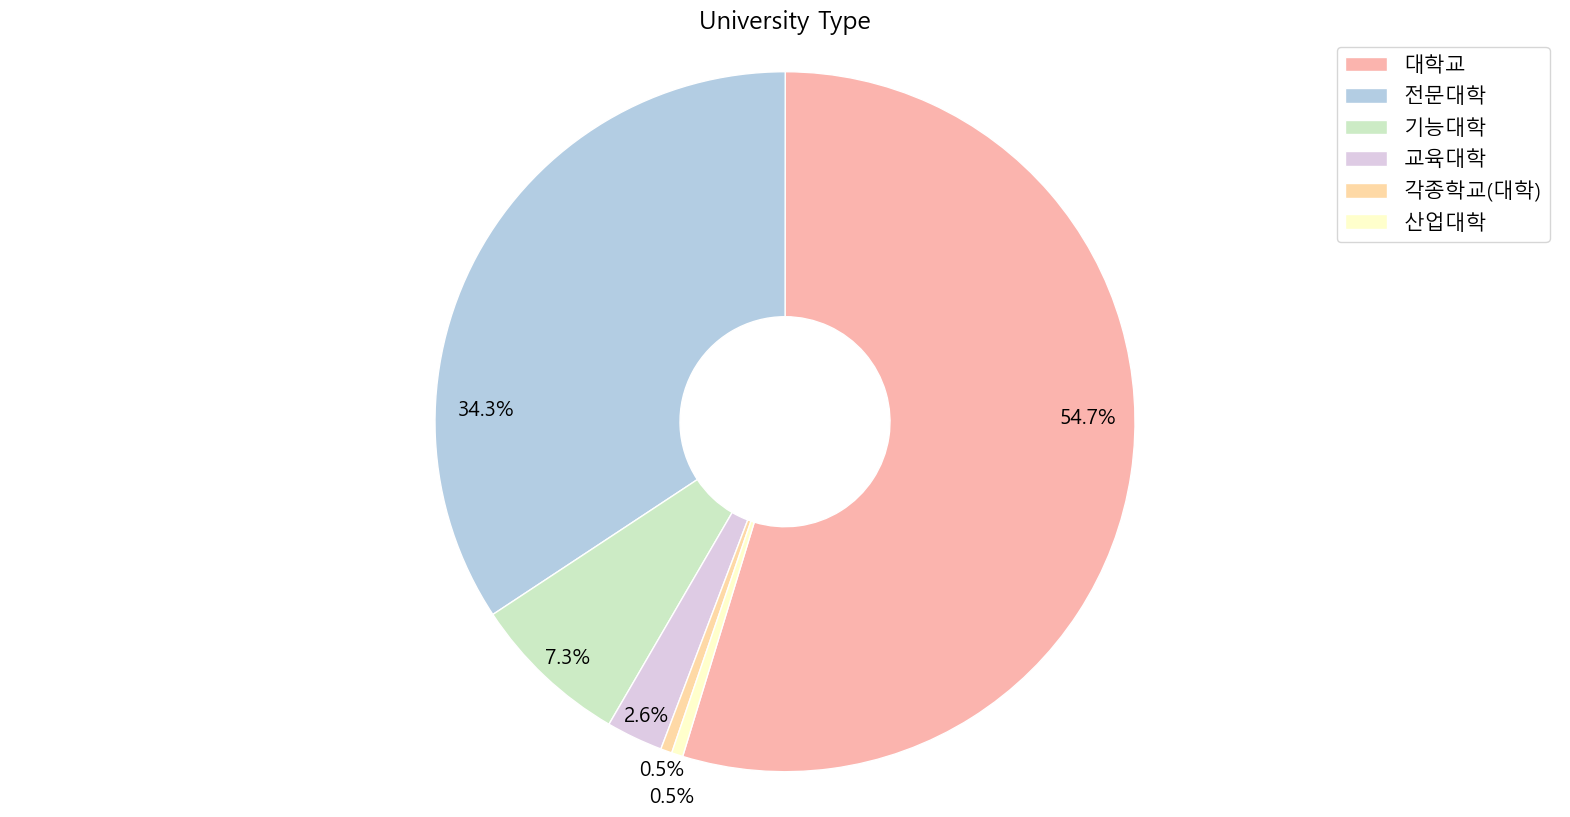

In [39]:
# 대학 종류에 대한 카운트 계산
university_type_counts = un_list_df['University_Type'].value_counts()
university_type_counts_df = university_type_counts.reset_index()
display(university_type_counts_df)

# 파이 차트 그리기
# 파이 차트 크기 설정
plt.figure(figsize=(20, 10))

# 부채꼴 스타일
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

labels = university_type_counts_df['University_Type']
sizes = university_type_counts_df['count']

plt.rcParams['font.size'] = 15

# 파이 차트 그리기, autopct: 각 항목의 비율을 소수점 첫째자리까지 표시, 첫 번째 항목이 시작되는 각도, 부채꼴 스타일
patches, texts, autotexts = plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=253, wedgeprops=wedgeprops) 
for i, (label, size) in enumerate(zip(labels, sizes)):
    x, y = autotexts[i].get_position()
    if i == 0:
        autotexts[i].set_position((x+0.27, y+0.1))
        autotexts[i].set_color('black')
    if i == 1:
        autotexts[i].set_position((x-0.327, y-0.25))
        autotexts[i].set_color('black')
    if i == 2:
        autotexts[i].set_position((x-0.21, y-0.24))
        autotexts[i].set_color('black')
    if i == 3:
        autotexts[i].set_position((x-0.138, y-0.3))
        autotexts[i].set_color('black')
    if i == 4:
        autotexts[i].set_position((x-0.15, y-0.43))
        autotexts[i].set_color('black')
    if i == 5:
        autotexts[i].set_position((x-0.14, y-0.5))
        autotexts[i].set_color('black')

# 원형으로 설정
plt.axis('equal')
#파이 차트 제목 설정
plt.title('University Type')
plt.legend(university_type_counts_df['University_Type'])

plt.show()

#### 💡 분석
- 대한민국 대학교 종류는 총 6개로 나뉨.
- 그 중 일반대학은 209개, 약 54.7%로 가장 높고 각종학교(대학) 및 산업대학 비율이 각 2개, 약 0.6%로 가장 낮음.

#### 📌 시사점
- 대한민국의 대학교는 일반대학과 전문대학이 전체 비율의 89%를 차지하고 있음.

#### ❓ 가설
- 일반대학과 전문대학이 높은 비중을 차지하고 있는 만큼 취업률의 비중도 일반대학과 전문대학의 비중이 높지 않을까?

#### 📊 전체 대학 설립 구분, 지역

In [40]:
establishment = un_list_df['Establishment_Type'].value_counts().reset_index()
region = un_list_df['Region'].value_counts().reset_index()

,Establishment_Type,count
0,사립,326
1,국립,39
2,공립,8
3,특별법법인,4
4,특별법국립,3
5,국립대법인,2


,Region,count
0,경기,69
1,서울,55
2,경북,34
3,충남,26
4,부산,23
5,경남,22
6,강원,22
7,전남,21
8,전북,20
9,충북,19


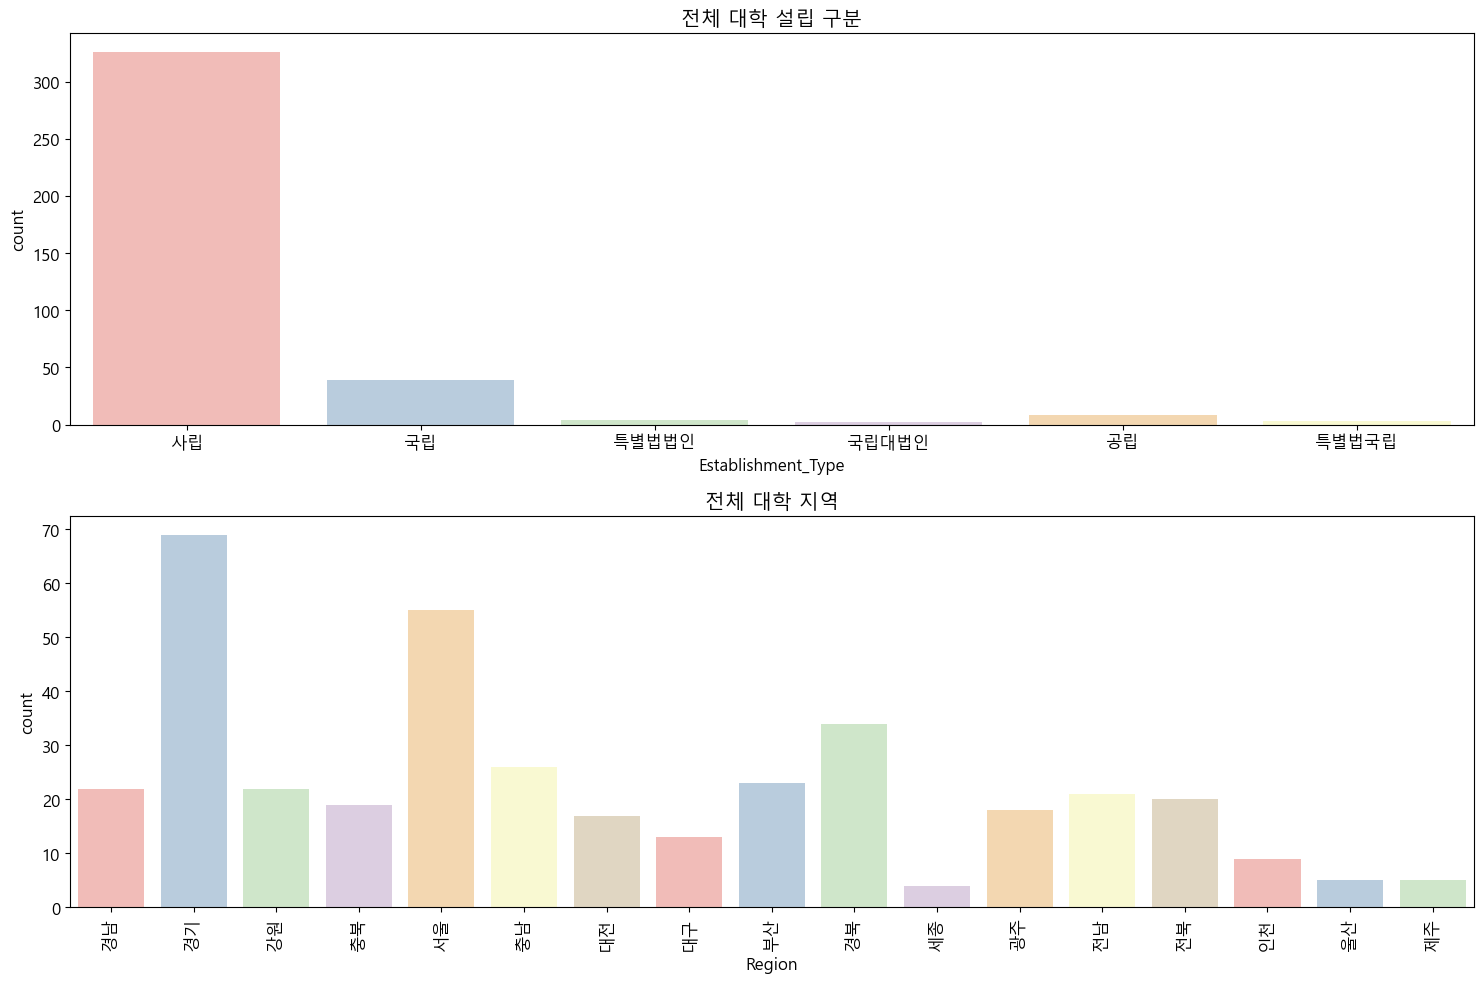

In [44]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

plt.rcParams['font.size'] = 12

sns.countplot(ax=axes[0], x='Establishment_Type', data=un_list_df, palette=colors)
# axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('전체 대학 설립 구분')
sns.countplot(ax=axes[1], x='Region', data=un_list_df, palette=colors)
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_title('전체 대학 지역')

display(establishment)
display(region)

plt.tight_layout()
plt.show()

#### 💡 분석
- 대한민국의 대학교 382개 중 사립 학교가 326개로 가장 많으며, 국립대법인 학교가 2개로 가장 적음.
- 위치는 경기 지역에 가장 많이 위치해있으며 69개 대학이 있고, 세종 지역에 가장 적게 위치해있으며 4개 대학이 있음.

#### 📌 시사점
- 대부분의 대학은 사립이며, 사립대 졸업생이 취업률에 가장 높은 비중을 차지할 것이라 판단됨.
- 서울, 경기 지역이 전체 비율의 약 32%를 차지하고 있으며, 수도권 지역에 대학이 가장 많이 위치해있음을 알 수 있음.

#### 📊 전체 대학 졸업자 성비(3년)

In [45]:
# 학년도, 대학명, 남자/여자 명수 가져와서 새로운 데이터 프레임에 담기
graduates_all = Employed_copy_all[['Year', 'Name', 'Graduates_Male', 'Graduates_Female']].copy()

# 각 대학 남자/여자 명수 더하여 토탈 카운트 계산
graduates_all['Graduates_total'] = graduates_all['Graduates_Male'] + graduates_all['Graduates_Female']

# 대학 별 3년 치 남자/여자 취업생 확인 
graduates_all_total = graduates_all.groupby('Name').sum('Graduates_total').reset_index()
graduates_all_total = graduates_all_total.drop(labels='Year', axis=1)

In [46]:
# 졸업생 토탈, 학교 정보 데이터 프레임 합치기
graduates_all_total = pd.merge(graduates_all_total, un_list_df, on='Name')

# 남자 합계 구하기
male_total = graduates_all_total['Graduates_Male'].sum()
# 새로운 데이터 프레임에 담기
gender = pd.DataFrame({'Male': [male_total]})
# 여자 합계 구하고 피처 추가
gender['Female'] = graduates_all_total['Graduates_Female'].sum()

# 데이터 프레임 행과 열 변경 후 새로운 인덱스 값 넣기
gender_df = gender.T.reset_index()
# 피처명 변경
gender_df = gender_df.rename(columns={'index': 'gender', 0: 'count'})

In [47]:
# 전체 인원 중 남녀 비율 확인
gender_all = gender_df['count'].sum()

gender_df['percentage'] = round((gender_df['count'] / gender_all) * 100, 2)

#### 📊 남녀 별 취업률 평균

In [48]:
# 각 대학교 취업률 포함 데이터 모두 합산
male_Employed = Employed_copy_all['Employed_Male'] +  Employed_copy_all['Overseas_Employment_Male'] + Employed_copy_all['Agriculture_Fishery_Male'] + Employed_copy_all['Entrepreneurship_Male'] + Employed_copy_all['Freelancer_Male']
female_Employed = Employed_copy_all['Employed_Female'] +  Employed_copy_all['Overseas_Employment_Female'] + Employed_copy_all['Agriculture_Fishery_Female'] + Employed_copy_all['Entrepreneurship_Female'] + Employed_copy_all['Freelancer_Female']

# 전체 취업률 데이터 합산
male_Employed = male_Employed.sum()
female_Employed = female_Employed.sum()

# 각 성별 카운트 데이터 값 가져오기
all_male_count = gender_df[gender_df['gender'] == 'Male']['count'].values[0]
all_female_count = gender_df[gender_df['gender'] == 'Female']['count'].values[0]

# 전체 취업률 미집계 데이터 합산
all_uncounted_male = Employed_copy_all['Uncounted_Male'].sum()
all_uncounted_female = Employed_copy_all['Uncounted_Female'].sum()

# 남녀 별 취업률 구하고 소수점 2째 자리까지 보여주기
male_Employed_rate = round((male_Employed / (all_male_count - all_uncounted_male)) * 100, 2)
female_Employed_rate = round((female_Employed / (all_female_count - all_uncounted_female)) * 100, 2)

# 새로운 데이터 프레임에 남녀 취업률 데이터 담기
gender_Employed = pd.DataFrame({'male_Employed': [male_Employed_rate]})
gender_Employed['female_Employed'] = female_Employed_rate

# 데이터 프레임 행, 열 위치 변경
gender_Employed_df = gender_Employed.T.reset_index()

# 피처명 변경
gender_Employed_df = gender_Employed_df.rename(columns={'index': 'gender', 0: 'Employed'})

,gender,count,percentage
0,Male,734561,48.65
1,Female,775427,51.35


,gender,Employed
0,male_Employed,67.42
1,female_Employed,64.26


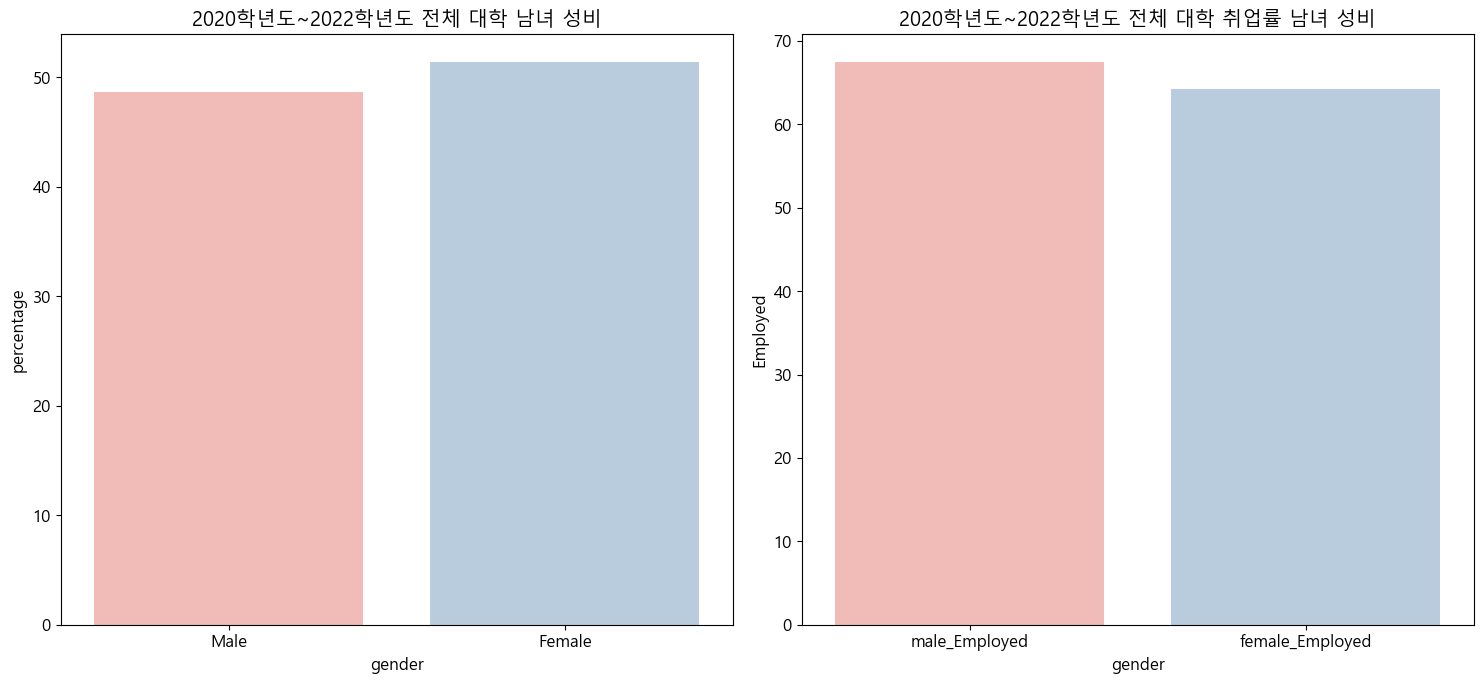

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

plt.rcParams['font.size'] = 12

# 전체 대학 남여 성비 확인
sns.barplot(ax=axes[0], x='gender', y='percentage', data=gender_df, palette=colors)
# axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('2020학년도~2022학년도 전체 대학 남녀 성비')
# 전체 대학 남여 취업률 확인
sns.barplot(ax=axes[1], x='gender', y='Employed', data=gender_Employed_df, palette=colors)
# axes[1].tick_params(axis='x', rotation=90)
axes[1].set_title('2020학년도~2022학년도 전체 대학 취업률 남녀 성비')

display(gender_df)
display(gender_Employed_df)

plt.tight_layout()
plt.show()

#### 💡 분석
- 전체 대학의 졸업자 남녀 비율은 여자가 약 51.35%, 남자가 48.65%을 차지했으며, 여자 졸업생이 더 높게 나타남.
- 전체 대학의 남녀 취업률에서 남자가 약 67.42%, 여자가 약 64.26%로 나타났으며, 남자가 약 3.16% 정도 높음.

#### 📌 시사점
- 졸업생 비율은 여성이 더 우세하나 취업률은 남성이 더 우세한 것으로 나타남.

#### 📊 전체 대학 취업률 순위(3년 평균)
※ 취업률이 0%인 대학교는 순위에 포함하지 않음.

In [51]:
# 취업률 계급 책정을 위한 함수 선언
def get_class(x):
    if x <= 19:
        return 10
    if x >= 20 and x < 30:
        return 20
    if x >= 30 and x < 40:
        return 30
    if x >= 40 and x < 50:
        return 40
    if x >= 50 and x < 60:
        return 50
    if x >= 60 and x < 70:
        return 60
    if x >= 70 and x < 80:
        return 70
    if x >= 80 and x < 90:
        return 80
    if x >= 90 and x < 100:
        return 90
    return 1

In [52]:
# 각 대학 별 3년간 평균 취업률 계산
em_all_rank = em_up_df.groupby('Name')['Employment_Rate'].mean().reset_index()
em_rank = em_all_rank[~ (em_all_rank['Employment_Rate'] == 0)]

# 전체 대학 취업률 내림차순 정렬
em_rank = em_rank.sort_values(by='Employment_Rate', ascending=False).reset_index(drop=True)

# 취업률 계급 넣기
em_rank['Employment_class'] = em_rank['Employment_Rate'].apply(get_class)

# 전체 대학 취업률 순위 넣기
em_rank['rank'] = em_rank['Employment_Rate'].rank(ascending=False)

# 순위 정수로 형변환
em_rank = em_rank.astype({'rank': 'int8'})

# 데이터 프레임 합치기
em_rank = pd.merge(em_rank, un_list_df, on='Name')

display(em_rank)

,Name,Employment_Rate,Employment_class,rank,University_Type,Establishment_Type,Region,Status
0,농협대학교,93.866667,90,1,전문대학,사립,경기,기존
1,가톨릭대학교 _제2캠퍼스,90.700000,90,2,대학교,사립,서울,기존
2,한국폴리텍 특성화대학 바이오캠퍼스,89.433333,80,3,기능대학,사립,충남,기존
3,을지대학교,89.400000,80,4,대학교,사립,대전,기존
4,한국폴리텍 VI 대학 영남융합기술캠퍼스,87.966667,80,5,기능대학,사립,대구,기존
...,...,...,...,...,...,...,...,...
366,호남신학대학교,49.333333,40,111,대학교,사립,광주,기존
367,대신대학교,49.100000,40,112,대학교,사립,경북,기존
368,한국폴리텍 V 대학 순천캠퍼스,48.900000,40,113,기능대학,사립,전남,기존
369,웅지세무대학교,46.300000,40,114,전문대학,사립,경기,기존


#### 📊 2020학년도 대학 취업률 순위

In [53]:
# 대학 별 3년간 평균 취업률 계산
em_2020_all_rank = em_2020_df.groupby('Name')['Employment_Rate'].mean().reset_index()
em_2020_rank = em_2020_all_rank[~ (em_2020_all_rank['Employment_Rate'] == 0)]

# 전체 대학 취업률 내림차순 정렬
em_2020_rank = em_2020_rank.sort_values(by='Employment_Rate', ascending=False).reset_index(drop=True)

# 취업률 계급 넣기
em_2020_rank['Employment_class'] = em_2020_rank['Employment_Rate'].apply(get_class)

# 전체 대학 취업률 순위 넣기
em_2020_rank['rank'] = em_2020_rank['Employment_Rate'].rank(ascending=False)

# 순위 정수로 형변환
em_2020_rank = em_2020_rank.astype({'rank': 'int8'})

em_2020_rank = pd.merge(em_2020_rank, un_list_df, on='Name')
em_2020_rank

,Name,Employment_Rate,Employment_class,rank,University_Type,Establishment_Type,Region,Status
0,농협대학교,94.2,90,1,전문대학,사립,경기,기존
1,한국폴리텍 특성화대학 바이오캠퍼스,91.6,90,2,기능대학,사립,충남,기존
2,가톨릭대학교 _제2캠퍼스,90.5,90,3,대학교,사립,서울,기존
3,한국폴리텍 I 대학 서울강서캠퍼스,86.3,80,4,기능대학,사립,서울,기존
4,춘해보건대학교,85.8,80,5,전문대학,사립,울산,기존
...,...,...,...,...,...,...,...,...
366,백제예술대학교,42.8,40,111,전문대학,사립,전북,기존
367,서울교육대학교,42.4,40,112,교육대학,국립,서울,기존
368,대신대학교,42.1,40,113,대학교,사립,경북,기존
369,영남신학대학교,40.0,40,114,대학교,사립,경북,기존


#### 📊 2021학년도 대학 취업률 순위

In [54]:
# 대학 별 3년간 평균 취업률 계산
em_2021_all_rank = em_2021_df.groupby('Name')['Employment_Rate'].mean().reset_index()
em_2021_rank = em_2021_all_rank[~ (em_2021_all_rank['Employment_Rate'] == 0)]

# 전체 대학 취업률 내림차순 정렬
em_2021_rank = em_2021_rank.sort_values(by='Employment_Rate', ascending=False).reset_index(drop=True)

# 취업률 계급 넣기
em_2021_rank['Employment_class'] = em_2021_rank['Employment_Rate'].apply(get_class)

# 전체 대학 취업률 순위 넣기
em_2021_rank['rank'] = em_2021_rank['Employment_Rate'].rank(ascending=False)

# 순위 정수로 형변환
em_2021_rank = em_2021_rank.astype({'rank': 'int8'})

em_2021_rank = pd.merge(em_2021_rank, un_list_df, on='Name')
em_2021_rank

,Name,Employment_Rate,Employment_class,rank,University_Type,Establishment_Type,Region,Status
0,농협대학교,95.4,90,1,전문대학,사립,경기,기존
1,한국폴리텍 V 대학 익산캠퍼스,91.1,90,2,기능대학,사립,전북,기존
2,가톨릭대학교 _제2캠퍼스,90.1,90,3,대학교,사립,서울,기존
3,을지대학교,87.3,80,4,대학교,사립,대전,기존
4,한국폴리텍 VI 대학 영남융합기술캠퍼스,87.3,80,4,기능대학,사립,대구,기존
...,...,...,...,...,...,...,...,...
365,대신대학교,48.9,40,110,대학교,사립,경북,기존
366,웅지세무대학교,46.7,40,111,전문대학,사립,경기,기존
367,부산장신대학교,45.2,40,112,대학교,사립,경남,기존
368,부산예술대학교,42.9,40,113,전문대학,사립,부산,기존


#### 📊 2022학년도 대학 취업률 순위

In [55]:
# 대학 별 3년간 평균 취업률 계산
em_2022_all_rank = em_2022_df.groupby('Name')['Employment_Rate'].mean().reset_index()
em_2022_rank = em_2022_all_rank[~ (em_2022_all_rank['Employment_Rate'] == 0)]

# 전체 대학 취업률 내림차순 정렬
em_2022_rank = em_2022_rank.sort_values(by='Employment_Rate', ascending=False).reset_index(drop=True)

# 취업률 계급 넣기
em_2022_rank['Employment_class'] = em_2022_rank['Employment_Rate'].apply(get_class)

# 전체 대학 취업률 순위 넣기
em_2022_rank['rank'] = em_2022_rank['Employment_Rate'].rank(ascending=False)

# 순위 정수로 형변환
em_2022_rank = em_2022_rank.astype({'rank': 'int8'})

em_2022_rank = pd.merge(em_2022_rank, un_list_df, on='Name')
em_2022_rank

,Name,Employment_Rate,Employment_class,rank,University_Type,Establishment_Type,Region,Status
0,을지대학교,97.9,90,1,대학교,사립,대전,기존
1,한국폴리텍 VI 대학 영남융합기술캠퍼스,92.2,90,2,기능대학,사립,대구,기존
2,농협대학교,92.0,90,3,전문대학,사립,경기,기존
3,가톨릭대학교 _제2캠퍼스,91.5,90,4,대학교,사립,서울,기존
4,한국폴리텍 특성화대학 바이오캠퍼스,89.5,80,5,기능대학,사립,충남,기존
...,...,...,...,...,...,...,...,...
366,금강대학교,52.1,50,111,대학교,사립,충남,기존
367,한국교원대학교,52.1,50,111,대학교,국립,충북,기존
368,웅지세무대학교,46.8,40,113,전문대학,사립,경기,기존
369,호남신학대학교,46.4,40,114,대학교,사립,광주,기존


#### 📊 2020~2022학년도 대학 취업률 히스토그램

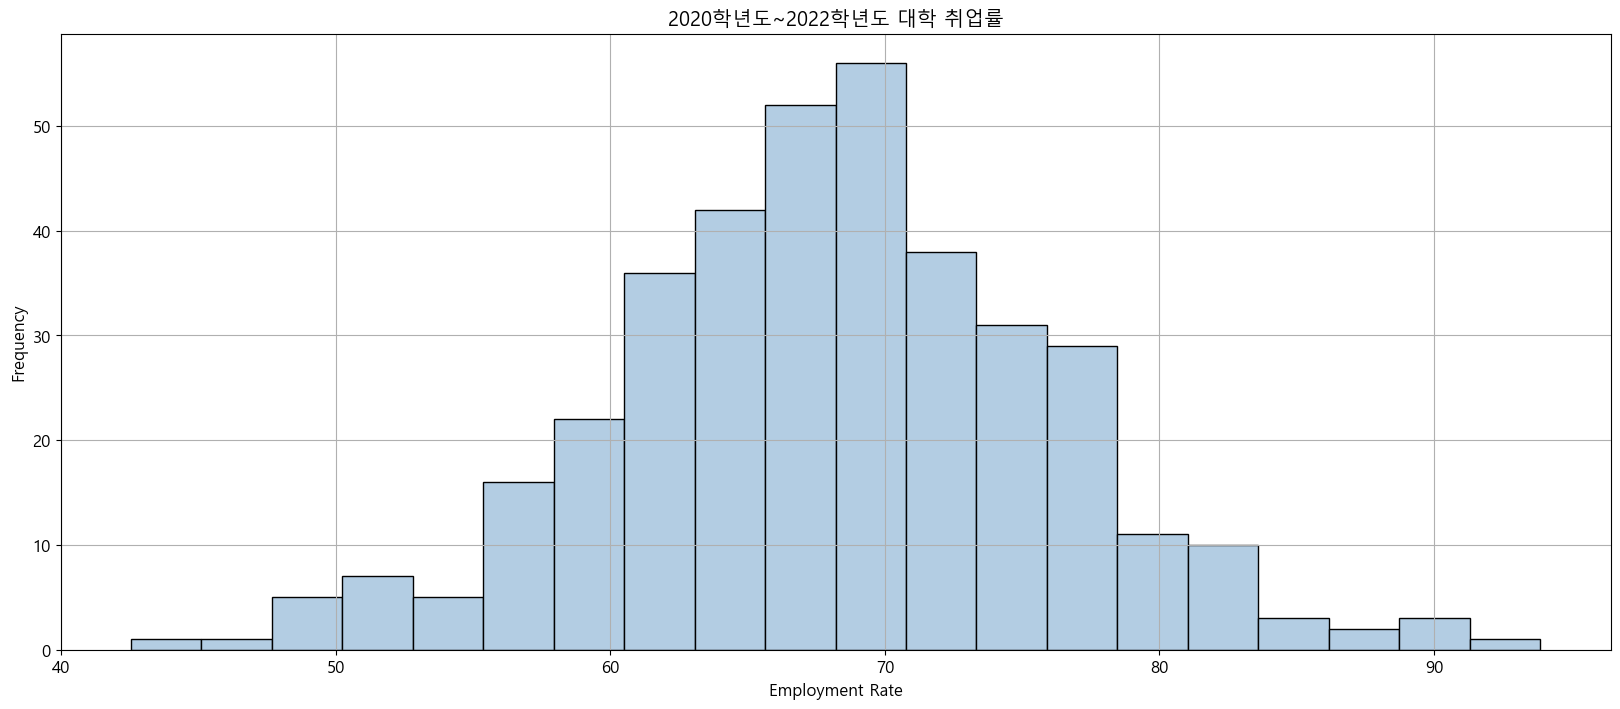

In [58]:
# 취업률 데이터가 담긴 데이터프레임의 "Employment_Rate" 열을 이용하여 히스토그램 그리기
plt.figure(figsize=(20, 8))
# 20개의 구간으로 나누어 히스토그램 그리기
plt.hist(em_rank['Employment_Rate'], bins=20, color=colors[1], edgecolor='black')
# x축 레이블 설정
plt.xlabel('Employment Rate')
# y축 레이블 설정
plt.ylabel('Frequency')
# 그래프 제목 설정
plt.title('2020학년도~2022학년도 대학 취업률')
# 그리드 표시
plt.grid(True)
plt.show()

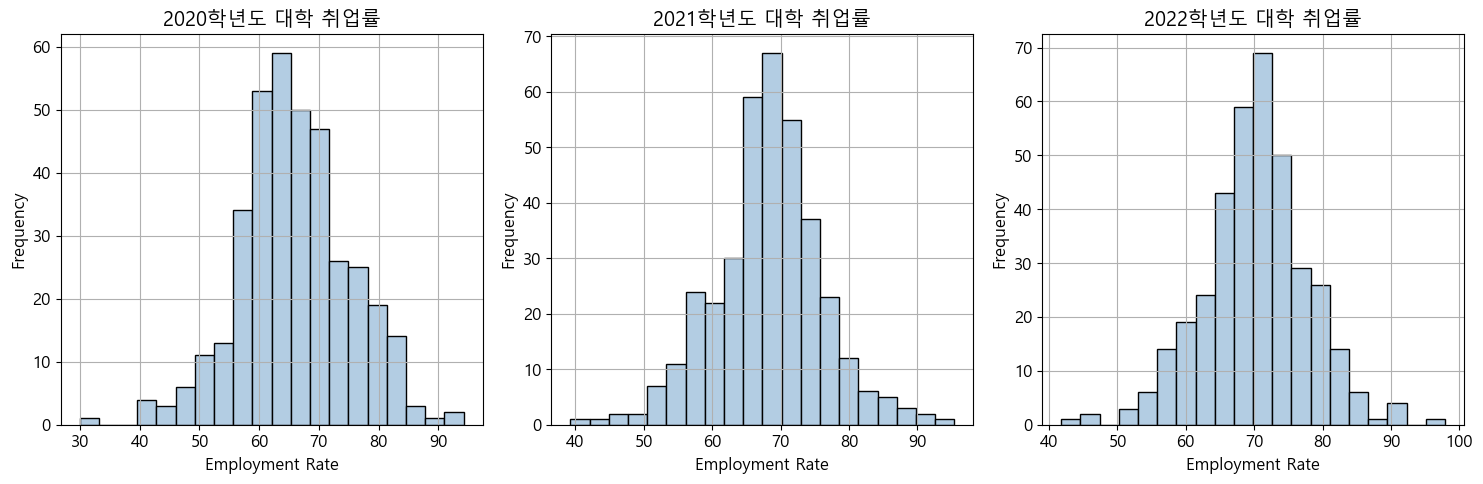

In [62]:
# 히스토그램을 그릴 학년도별 대학 취업률 데이터 프레임과 학년도 리스트
em_rank_dataframes = [em_2020_rank, em_2021_rank, em_2022_rank]
years = ['2020', '2021', '2022']

# 서브플롯 생성
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 각 서브플롯에 대한 히스토그램 그리기
for i, (dataframe, year) in enumerate(zip(em_rank_dataframes, years)):
    axes[i].hist(dataframe['Employment_Rate'], bins=20, color=colors[1], edgecolor='black')
    axes[i].set_xlabel('Employment Rate')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{year}학년도 대학 취업률')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

#### 💡 분석
- 농협대학교가 취업률 약 93.86%로 가장 높은 취업률을 달성하였으며, 부산예술대학이 약 42.53%로 가장 낮은 취업률을 달성함.
- 약 60~80% 취업률을 달성한 대학의 분포가 높게 나타났으며, 3년 간 비슷한 양상을 띠고 있다.

#### 📌 시사점
- 농협대학교의 경우 단위농협에서 운영하는 대학으로 졸업 후 해당 기업의 취업추천 제도 또는 농협대학 지원 전형이 있어 높은 취업률을 달성함.
- 부산예술대학교의 경우 예술 분야 교과과정의 자율성을 지키고자 대학기본역량에 참여하지 않는 등 일반대학과 같이 취·창업에 중점을 두고 있지 않아 저조한 취업률이 나타났다 판단됨.

#### ❓ 가설
- 취업률이 저조한 대학의 취업률 미집계 데이터 확인이 필요

#### 📊 대학 종류 별 취업률 비중 

In [63]:
# 대학 종류별로 취업률의 합계를 계산
employment_rate_sum = em_rank.groupby('University_Type')['Employment_Rate'].sum()

# 전체 취업률의 합계를 계산
total_employment_rate = em_rank['Employment_Rate'].sum()

# 각 대학 종류별로 취업률의 비중을 계산
employment_rate_weight = employment_rate_sum / total_employment_rate

# 비중 백분율로 변환
employment_rate_weight = pd.DataFrame(employment_rate_weight).reset_index()
perentile = pd.DataFrame(round((employment_rate_sum / total_employment_rate) * 100, 2)).reset_index()

# 데이터 프레임 합치기
employment_rate_weight = pd.merge(employment_rate_weight, perentile, on='University_Type')
# 데이터 프레임 피처명 변경
employment_rate_weight = employment_rate_weight.rename(columns={'Employment_Rate_x': 'Employment_Rate', 'Employment_Rate_y': 'perentile'})
display(employment_rate_weight)

,University_Type,Employment_Rate,perentile
0,각종학교(대학),0.004900,0.49
1,교육대학,0.024414,2.44
2,기능대학,0.086455,8.65
3,대학교,0.509068,50.91
4,산업대학,0.005718,0.57
5,전문대학,0.369445,36.94


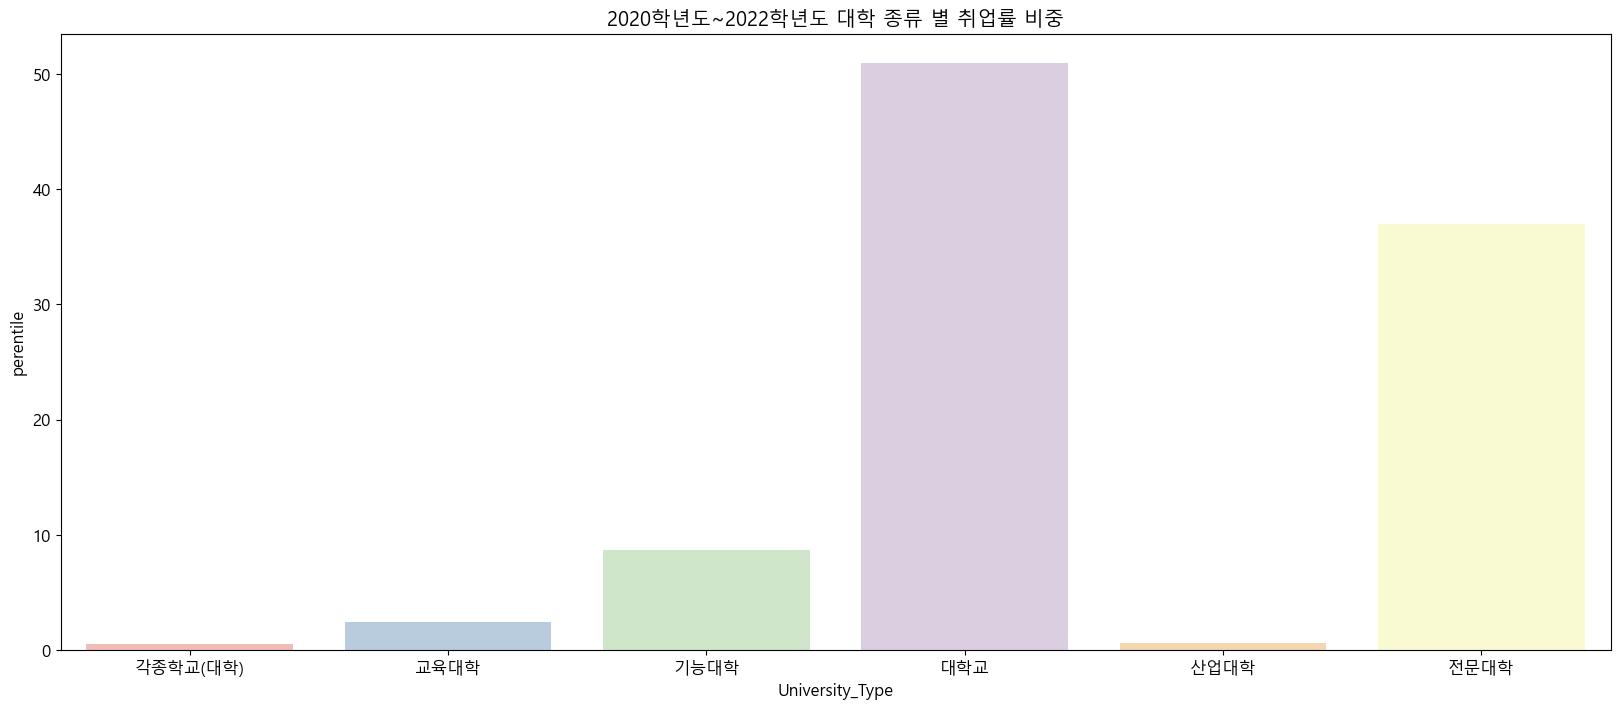

In [67]:
plt.figure(figsize=(20, 8))

# 대학 종류 별 취업률 비중
sns.barplot(x='University_Type', y='perentile', data=employment_rate_weight, palette=colors)
plt.title('2020학년도~2022학년도 대학 종류 별 취업률 비중')
plt.show()

#### 💡 분석
- 취업률은 일반대학이 약 50.91%로 가장 높은 비중을 차지하고 있으며, 각종학교(대학)이 약 0.49%로 가장 낮은 비중을 차지함.

#### 📌 시사점
- 대학 종류의 비중과 대학 종류 별 취업 비중이 유사하게 나타는 것을 보아 종류의 개수가 취업률에 영향을 주는 것으로 판단됨.

#### 📊 취업률이 0%인 대학교(3년 평균)

In [68]:
# 취업률이 0인 대학교 데이터 가져오기
em_zero_rank = em_all_rank[em_all_rank['Employment_Rate'] == 0.0]
em_zero_rank = pd.merge(em_zero_rank, un_list_df, on='Name')
em_zero_rank

,Name,Employment_Rate,University_Type,Establishment_Type,Region,Status
0,가톨릭대학교 _제3캠퍼스,0.0,대학교,사립,서울,기존
1,감리교신학대학교,0.0,대학교,사립,서울,기존
2,광주가톨릭대학교,0.0,대학교,사립,전남,기존
3,대전가톨릭대학교,0.0,대학교,사립,세종,기존
4,대전신학대학교,0.0,대학교,사립,대전,기존
5,수원가톨릭대학교,0.0,대학교,사립,경기,기존
6,아신대학교,0.0,대학교,사립,경기,기존
7,영산선학대학교,0.0,대학교,사립,전남,기존
8,인천가톨릭대학교,0.0,대학교,사립,인천,기존
9,장로회신학대학교,0.0,대학교,사립,서울,기존


#### 📊 2020학년도 취업률이 0%인 대학교

In [69]:
# 2020학년도 취업률이 0인 대학교 데이터 가져오기
em_2020_zero_rank = em_2020_all_rank[em_2020_all_rank['Employment_Rate'] == 0.0]
em_2020_zero_rank = pd.merge(em_2020_zero_rank, un_list_df, on='Name')
em_2020_zero_rank

,Name,Employment_Rate,University_Type,Establishment_Type,Region,Status
0,가톨릭대학교 _제3캠퍼스,0.0,대학교,사립,서울,기존
1,감리교신학대학교,0.0,대학교,사립,서울,기존
2,광주가톨릭대학교,0.0,대학교,사립,전남,기존
3,대전가톨릭대학교,0.0,대학교,사립,세종,기존
4,대전신학대학교,0.0,대학교,사립,대전,기존
5,수원가톨릭대학교,0.0,대학교,사립,경기,기존
6,아신대학교,0.0,대학교,사립,경기,기존
7,영산선학대학교,0.0,대학교,사립,전남,기존
8,인천가톨릭대학교,0.0,대학교,사립,인천,기존
9,장로회신학대학교,0.0,대학교,사립,서울,기존


#### 📊 2021학년도 취업률이 0%인 대학교

In [70]:
# 2021학년도 취업률이 0인 대학교 데이터 가져오기
em_2021_zero_rank = em_2021_all_rank[em_2021_all_rank['Employment_Rate'] == 0.0]
em_2021_zero_rank = pd.merge(em_2021_zero_rank, un_list_df, on='Name')
em_2021_zero_rank

,Name,Employment_Rate,University_Type,Establishment_Type,Region,Status
0,가톨릭대학교 _제3캠퍼스,0.0,대학교,사립,서울,기존
1,감리교신학대학교,0.0,대학교,사립,서울,기존
2,광주가톨릭대학교,0.0,대학교,사립,전남,기존
3,대전가톨릭대학교,0.0,대학교,사립,세종,기존
4,대전신학대학교,0.0,대학교,사립,대전,기존
5,수원가톨릭대학교,0.0,대학교,사립,경기,기존
6,아신대학교,0.0,대학교,사립,경기,기존
7,영산선학대학교,0.0,대학교,사립,전남,기존
8,인천가톨릭대학교,0.0,대학교,사립,인천,기존
9,장로회신학대학교,0.0,대학교,사립,서울,기존


#### 📊 2022학년도 취업률이 0%인 대학교

In [71]:
# 2022학년도 취업률이 0인 대학교 데이터 가져오기
em_2022_zero_rank = em_2022_all_rank[em_2022_all_rank['Employment_Rate'] == 0.0]
em_2022_zero_rank = pd.merge(em_2022_zero_rank, un_list_df, on='Name')
em_2022_zero_rank

,Name,Employment_Rate,University_Type,Establishment_Type,Region,Status
0,가톨릭대학교 _제3캠퍼스,0.0,대학교,사립,서울,기존
1,감리교신학대학교,0.0,대학교,사립,서울,기존
2,광주가톨릭대학교,0.0,대학교,사립,전남,기존
3,대전가톨릭대학교,0.0,대학교,사립,세종,기존
4,대전신학대학교,0.0,대학교,사립,대전,기존
5,수원가톨릭대학교,0.0,대학교,사립,경기,기존
6,아신대학교,0.0,대학교,사립,경기,기존
7,영산선학대학교,0.0,대학교,사립,전남,기존
8,인천가톨릭대학교,0.0,대학교,사립,인천,기존
9,장로회신학대학교,0.0,대학교,사립,서울,기존


In [72]:
import folium
import requests

In [73]:
# 서울을 중심으로 지도 생성
map_center = [36, 127.0]

# 대학 위치 데이터 불러오기
university_data = pd.read_csv('./datasets/zero_region.csv')
display(university_data)

# Folium 지도 객체 생성
map_obj = folium.Map(location=map_center, zoom_start=7)

# 대학 위치 정보를 지도에 마커로 표시
for index, row in university_data.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], tooltip=row['Name']).add_to(map_obj)

# 생성한 지도를 HTML 파일로 저장하거나 직접 출력
map_obj.save("university_map.html")

map_obj

,Establishment_Type,Region,Status,Name,Latitude,Longitude
0,사립,서울,기존,가톨릭대학교 _제3캠퍼스,37.584813,127.004844
1,사립,서울,기존,감리교신학대학교,37.567297,126.962276
2,사립,전남,기존,광주가톨릭대학교,35.150643,126.868699
3,사립,세종,기존,대전가톨릭대학교,36.655218,127.197973
4,사립,대전,기존,대전신학대학교,36.350110,127.423535
5,사립,경기,기존,수원가톨릭대학교,37.195905,126.932953
6,사립,경기,기존,아신대학교,37.510446,127.427046
7,사립,전남,기존,영산선학대학교,35.327318,126.441406
8,사립,인천,기존,인천가톨릭대학교,37.657475,126.448979
9,사립,서울,기존,장로회신학대학교,37.550150,127.103877


#### 💡 분석
- 3년간 취업률이 0%로 나타는 대학은 총 11개의 대학.
- '한국폴리텍 V 대학 순천캠퍼스'는 2021학년도에만 취업률이 0%로 집계된 것을 확인함.

#### 📌 시사점
- 취업률이 0%인 대학의 경우 대부분이 종교 특성을 지닌 대학이며, 졸업생의 대부분이 취업 대신 진학 또는 종교 단체(4대 보험 미적용)에 포함된 것으로 판단됨.
- 대부분 수도권 지역에 있으며, 일부는 지방에 위치함.

#### ❓ 가설
- 졸업생이 있으나 취업률이 0인 대학의 학생들은 취업률 미집계 데이터에 포함된 것이 아닐까?

#### 📊 취업률이 0%인 대학의 취업률 미집계 현황(3년 치)

In [74]:
# 전체 대학 3년 치 취업률 미집계 인원 집계 후 새로운 데이터 프레임 생성
Uncounted_df = Employed_all.groupby('Name')['Uncounted_total'].sum().reset_index()
# 졸업생 인원 비교를 위해 데이터 프레임에 졸업생 카운트 피처 추가
Uncounted_df['Graduates_total'] = Employed_all.groupby('Name')['Graduates_total'].sum().reset_index()['Graduates_total']

# 취업률 미집계 데이터 정리
uncounted_total = uncounted_all.groupby('Name').sum('Scholar_total').reset_index()
# year테이블 삭제
uncounted_total = uncounted_total.drop(labels='Year', axis=1)

# 데이터 프레임 병합
Uncounted_df = pd.merge(Uncounted_df, uncounted_total, on='Name')

# 취업률 0인 대학의 데이터만 남기기
Uncounted_df = Uncounted_df[~ Uncounted_df['Name'].isin(em_rank['Name'])].reset_index(drop=True)

Uncounted_df

,Name,Uncounted_total,Graduates_total,Scholar_total,Military_total,Unemployed_total,Foreign_total,Excluded_total
0,가톨릭대학교 _제3캠퍼스,93,93,56,0,0,5,32
1,감리교신학대학교,583,583,138,20,0,2,423
2,광주가톨릭대학교,44,44,25,0,0,1,18
3,대전가톨릭대학교,34,34,25,0,0,0,9
4,대전신학대학교,78,78,29,4,0,0,45
5,수원가톨릭대학교,93,93,62,0,0,4,27
6,아신대학교,481,481,68,14,0,9,390
7,영산선학대학교,23,23,21,0,0,1,1
8,인천가톨릭대학교,41,41,28,0,0,2,11
9,장로회신학대학교,492,492,145,21,0,5,321


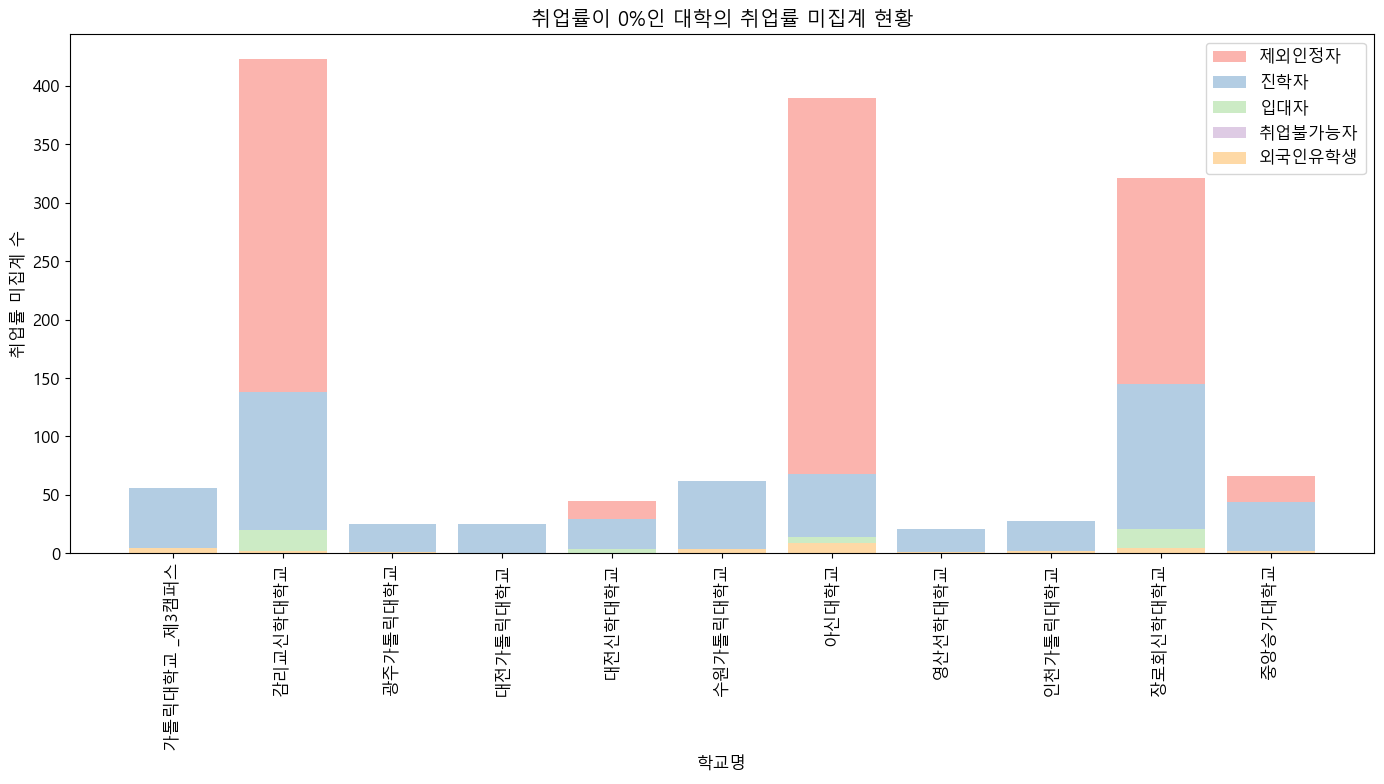

In [76]:
# 데이터 프레임에서 학교명과 각 항목의 값을 추출합니다.
schools = Uncounted_df['Name']
scholar_total = Uncounted_df['Scholar_total']
military_total = Uncounted_df['Military_total']
unemployed_total = Uncounted_df['Unemployed_total']
foreign_total = Uncounted_df['Foreign_total']
excluded_total = Uncounted_df['Excluded_total']

# 그래프를 그리기 위한 설정
plt.figure(figsize=(14, 8))
plt.bar(schools, excluded_total, color=colors[0], label='제외인정자')
plt.bar(schools, scholar_total, color=colors[1], label='진학자')
plt.bar(schools, military_total, color=colors[2], label='입대자')
plt.bar(schools, unemployed_total, color=colors[3], label='취업불가능자')
plt.bar(schools, foreign_total, color=colors[4], label='외국인유학생')



# 그래프에 대한 라벨과 범례 추가
plt.xlabel('학교명')
plt.ylabel('취업률 미집계 수')
plt.title('취업률이 0%인 대학의 취업률 미집계 현황')
plt.xticks(rotation=90)
plt.legend()

# 그래프 출력
plt.tight_layout()
plt.show()

#### 💡 분석
- 3년 간 취업률이 0%로 나오는 대학의 졸업생 전원이 취업률 미집계 데이터로 집계됨.
- 제외인정자로 들어간 학생이 가장 많았고, 진학자가 다음으로 많은 것을 확인함.

#### 📌 시사점
- 제외인정자 집계 기준 중 '종교지도자 양성 학생'이 포함됨.  
  따라서, 제외인정자의 경우 종교와 관련 사유로 취업률에 집계되지 않았다 판단됨.

#### 📊 2021학년도 한국폴리텍 V 대학 순천캠퍼스 취업률 미집계 현황

In [77]:
# 전체 대학 2022학년도 데이터만 추출하여 새로운 데이터 프레임 생성
Uncounted_2021_df = Employed_all[Employed_all['Year'] == 2021].reset_index(drop=True)
# 필요한 피처만 가져오기
Uncounted_2021_df = Uncounted_2021_df[['Name', 'Graduates_total', 'Uncounted_total', 'Others_total']]
# 한국폴리텍 V 대학 순천캠퍼스의 정보만 가져오기
Uncounted_2021_df = Uncounted_2021_df[Uncounted_2021_df['Name'] == '한국폴리텍 V 대학 순천캠퍼스']
display(Uncounted_2021_df)

# 그래프 그리기 쉽도록 데이터 프레임 수정
Uncounted_2021_up_df = Uncounted_2021_df.T.reset_index()
Uncounted_2021_up_df = Uncounted_2021_up_df[~ (Uncounted_2021_up_df['index'] == 'Name')]
Uncounted_2021_up_df = Uncounted_2021_up_df[~ (Uncounted_2021_up_df['index'] == 'Graduates_total')]. reset_index(drop=True)
Uncounted_2021_up_df = Uncounted_2021_up_df.rename(columns={'index': 'uncounted', 363: 'count'})

,Name,Graduates_total,Uncounted_total,Others_total
363,한국폴리텍 V 대학 순천캠퍼스,11,9,2


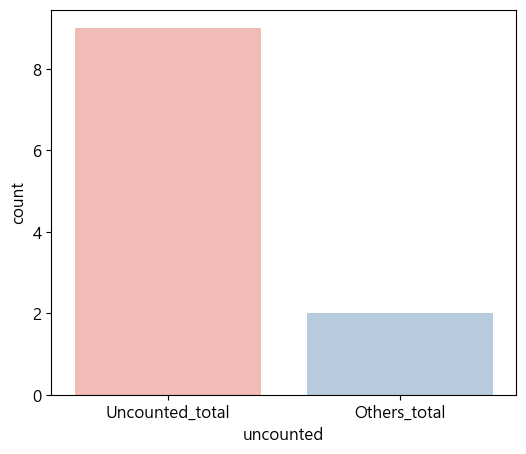

In [82]:
plt.figure(figsize=(6, 5))

# 취업률 미집계 현황 확인
sns.barplot(x='uncounted', y='count', data=Uncounted_2021_up_df, palette=colors)

plt.show()

In [85]:
# 졸업생 성별 확인
po_2021_df = Employed_copy_all[Employed_copy_all['Name'] == '한국폴리텍 V 대학 순천캠퍼스']
po_2021_df = po_2021_df[po_2021_df['Year'] == 2021]

selected_data = po_2021_df[['Name', 'Graduates_Male', 'Graduates_Female']].reset_index(drop=True)
selected_data

,Name,Graduates_Male,Graduates_Female
0,한국폴리텍 V 대학 순천캠퍼스,11,0


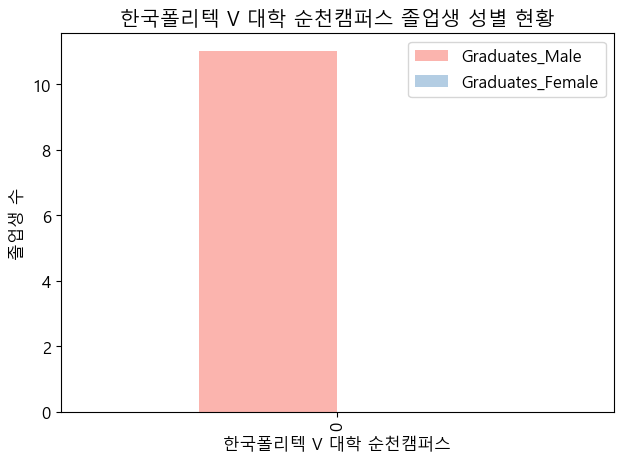

In [86]:
selected_data.plot(kind='bar', color=colors)

# 그래프에 대한 라벨과 타이틀 추가
plt.xlabel('한국폴리텍 V 대학 순천캠퍼스')
plt.ylabel('졸업생 수')
plt.title('한국폴리텍 V 대학 순천캠퍼스 졸업생 성별 현황')

# 그래프 출력
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### 💡 분석
- 졸업자 11명 중 취업률 미집계 데이터 9개, 미상 데이터 2개로 나타남.

#### 📌 시사점
- 별개의 캠퍼스로 나눠져 있는 폴리텍대학 특성상 재학생/졸업생 수가 현저히 적어 취업률이 0%로 집계되었다고 판단됨.

#### ❓ 가설
- 취업을 주 목적으로 하는 종합기술전문대학에서 왜 취업률 0%로 집계됐을까?  
  대학 내 남학생 비율이 높은데, 졸업생들의 입대와 관련이 있을까?

#### 📊 2021학년도 한국폴리텍 V 대학 순천캠퍼스 취업률 미집계 세부 현황

In [84]:
# 취업률 미집계 데이터 정리
uncounted_all_2021 = uncounted_all[uncounted_all['Year'] == 2021]
uncounted_all_2021 = uncounted_all_2021[uncounted_all_2021['Name'] == '한국폴리텍 V 대학 순천캠퍼스']

# year테이블 삭제
uncounted_all_2021_total = uncounted_all_2021.drop(labels='Year', axis=1)
display(uncounted_all_2021_total)

# 그래프를 그리기 쉽도록 데이터 프레임 수정
uncounted_all_2021_up_total = uncounted_all_2021_total.drop(labels='Name', axis=1)
uncounted_all_2021_up_total = uncounted_all_2021_up_total.T.reset_index()
uncounted_all_2021_up_total = uncounted_all_2021_up_total.rename(columns={'index': 'uncounted_detail', 745: 'count'})

,Name,Scholar_total,Military_total,Unemployed_total,Foreign_total,Excluded_total
745,한국폴리텍 V 대학 순천캠퍼스,0,9,0,0,0


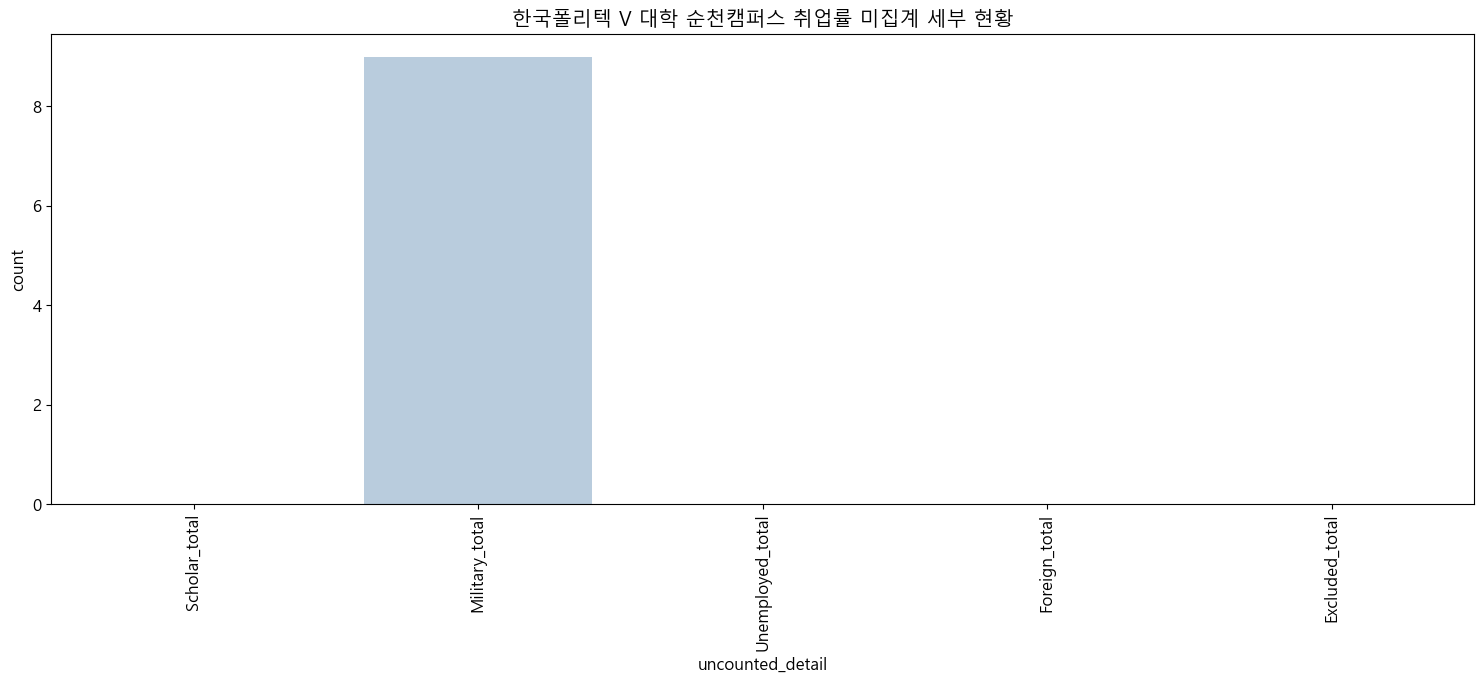

In [89]:
plt.figure(figsize=(15, 7))

# 취업률 미집계 세부 확인
sns.barplot(x='uncounted_detail', y='count', data=uncounted_all_2021_up_total, palette=colors)
plt.xticks(rotation=90)
plt.title('한국폴리텍 V 대학 순천캠퍼스 취업률 미집계 세부 현황')

plt.tight_layout()
plt.show()

#### 💡 분석
- 2021학년도 '한국폴리텍 V 대학 순천캠퍼스'의 졸업생은 모두 남성.
- 해당 학생들이 졸업 후 모두 입대했음을 확인함.

#### 📌 시사점
- 2/3년제 전문대 및 남성 비율이 높은 대학에서 입대로 인한 취업률 감소 현상이 나타남.

### Ⅴ. 분석 결과

## 2020학년도~2022학년도 전국 대학 취업률 분석 및 진단

### □ 전국 대학 현황 분석
#### Ⅰ. 전국 대학 운영 현황
[분석]
- 전국 대학 종류는 일반 대학(54.7%)과 전문대학(34.3%)이 가장 높은 비중을 차지함.
- 설립 구분은 사립 대학이 가장 높은 비중을 차지했으며, 수도권(서울, 경기) 지역에 대학이 많이 분포되어 있음.

<br>

[시사점]
- 대한민국의 대학교는 일반대학과 전문대학이 전체 비율의 89%를 차지하고 있음.
- 대부분의 대학은 사립이며, 사립대 졸업생이 취업률에 가장 높은 비중을 차지할 것이라 판단됨.
- 서울, 경기 지역이 전체 비율의 약 32%를 차지하고 있으며, 수도권 지역에 대학이 가장 많이 위치해있음을 알 수 있음.

<br>
<br>

#### Ⅱ. 전국 대학 졸업생 분석
[분석]
- 전국 대학 졸업생 성비는 남성(48.65%), 여성(51.35%)로 여성 비율이 높게 나타남.

<br>
<br>
<br>

### □ 전국 대학 졸업생 취업률 분석
#### Ⅰ. 전국 대학 취업자 남녀 성비 현황
[분석]
- 전국 대학 취업자 남녀 성비는 남자(67.42%, 여성 64.26%)로 남성 비율이 더 높게 나타남.

<br>

[시사점]
- 졸업생 비율은 여성이 더 우세하나 취업률은 남성이 더 우세한 것으로 나타남.

<br>
<br>

#### Ⅱ. 전국 대학 취업률 순위
[분석]
- 전국 대학 취업률 순위는 농협대학이 취업률 약 93.86%로 가장 높은 취업률을 달성하였으며, 부산예술대학이 약 42.53%로 가장 낮은 취업률을 달성함.
- 약 60~80% 취업률을 달성한 대학의 분포가 높게 나타났으며, 3년 간 비슷한 양상을 띠고 있음.

<br>

[시사점]
- 농협대학교의 경우 단위농협에서 운영하는 대학으로 졸업 후 해당 기업의 취업추천 제도 또는 농협대학 지원 전형이 있어 높은 취업률을 달성함.
- 부산예술대학교의 경우 예술 분야 교과과정의 자율성을 지키고자 대학기본역량에 참여하지 않는 등 일반대학과 같이 취·창업에 중점을 두고 있지 않아 저조한 취업률이 나타났다 판단됨.

<br>
<br>

#### Ⅲ. 대학 종류 별 취업률 비중
[분석]
- 취업률은 일반대학이 약 50.91%로 가장 높은 비중을 차지하고 있으며, 각종학교(대학)이 약 0.49%로 가장 낮은 비중을 차지함.

<br>

[시사점]
- 대학 종류의 비중과 대학 종류 별 취업 비중이 유사하게 나타는 것을 보아 종류의 개수가 취업률에 영향을 주는 것으로 판단됨.

<br>
<br>

#### Ⅲ. 취업률이 0%로 나타나는 대학 분석
[분석]
- 3년간 취업률이 0%로 나타는 대학은 총 11개의 대학.
- '한국폴리텍 V 대학 순천캠퍼스'는 2021학년도에만 취업률이 0%로 집계된 것을 확인함.

- 3년 간 취업률이 0%로 나오는 대학의 졸업생 전원이 취업률 미집계 데이터로 집계됨.
- 제외인정자로 들어간 학생이 가장 많았고, 진학자가 다음으로 많은 것을 확인함.

<br>

[시사점]
- 취업률이 0%인 대학의 경우 대부분이 종교 특성을 지닌 대학이며, 졸업생의 대부분이 취업 대신 진학 또는 종교 단체(4대 보험 미적용)에 포함된 것으로 판단됨.
- 대부분 수도권 지역에 있으며, 일부는 지방에 위치함.

- 제외인정자 집계 기준 중 '종교지도자 양성 학생'이 포함됨. 따라서, 제외인정자의 경우 종교와 관련 사유로 취업률에 집계되지 않았다 판단됨.

<br>
<br>

#### ○ 2021학년도 한국폴리텍 V 대학 순천캠퍼스 취업률 미집계 현황
[분석]
- 졸업자 11명 중 취업률 미집계 데이터 9개, 미상 데이터 2개로 나타남.
- 2021학년도 '한국폴리텍 V 대학 순천캠퍼스'의 졸업생은 모두 남성.
- 해당 학생들이 졸업 후 모두 입대했음을 확인함.

<br>

[시사점]
- 별개의 캠퍼스로 나눠져 있는 폴리텍대학 특성상 재학생/졸업생 수가 현저히 적어 취업률이 0%로 집계되었다고 판단됨.
- 2/3년제 전문대 및 남성 비율이 높은 대학에서 입대로 인한 취업률 감소 현상이 나타남.

<br>
<br>
<br>

### □ 취업률에 분석 따른 대학 혁신 전략
#### ○ 산학협력를 통한 직무 적합형 인재 발굴 및 취업 연계
- 전국 대학 취업률 상위권 대학인 '농협대학교'의 경우 산학협력을 통해 직무 적합형 인재를 발굴하고 취업까지 연계하여 취업률을 향상함.
- 가족회사(협약), 산학협력 교과목 개발(현장실습, 캡스톤디자인) 등을 통해 직무 적합형 인재를 발굴하고 취업까지 연계될 수 있도록 정책연구 진행이 필요함.

<br>

### □ 개선방안 
#### ○ 대학 특성에 따른 취업률 평가 기준 조정 필요
- 예술 분야 특화 대학 등 대학 특성에 따라 취업률이 저조할 수 있음.
- 대학역량진단 검사 시 대학 특성에 따른 평가 기준 조정이 필요할 것으로 보임.